# SyriaTel Customer Churn Prediction Project 

## Business Understanding 


**Business Problem**:  Reducing the rate of customer churn for SyriaTel Telecom  
**Background**:  SyriaTel, a major player in the telecommunications industry, is dealing with a serious problem of customer churn, which occurs when customers cancel their subscriptions, leading to a loss of revenue. To tackle this challenge, SyriaTel plans to develop a predictive model to identify customers who are at risk of churning. By reaching out to these customers with targeted retention strategies, SyriaTel aims to decrease churn rates and keep valuable customers.  
**Problem statement**: Can we predict customer churn for SyriaTel and determine the main factors contributing to it, allowing the company to develop effective retention strategies.

### Objectives:  
 - Develop a Churn Prediction model capable of accurately identifying customers likely to churn using the available dataset.
 - Discover the key patterns and features that contribute to predicting customer churn.  
 
This initiative supports SyriaTel's objective of retaining customers and minimizing revenue loss from churn, highlighting the value of data-driven decision-making in the telecommunications sector.

### Expected Outcome  
The main metric for evaluating the classification model's performance is 'recall,' which measures how well the model identifies customers likely to churn. The goal is to minimize false negatives since missing a potential churner is more costly for the business than incorrectly predicting a non-churner. The target is to achieve at least 80% recall.

However, a balance is necessary. Predicting that all customers will churn would result in perfect recall but offer no real business value, as not all customers are at risk. Therefore, in addition to recall, 'precision' and 'accuracy' will be used as secondary metrics to ensure a comprehensive assessment of the model's performance.

## Import the libraries  
Here, we import the various necessary libraries that we will be using in this project. They include Pandas, Numpy, visualization libraries like matplotlib and seaborn, various scikit-learn modules for machine learning and metrics we will use for evaluating our models.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

## Data Understanding  

In the data folder is a "telcom_data.csv" file, a dataset from SyriaTel Telcom, that contains data about various customers, and whether they churned or not.  

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Loading the dataset
df = pd.read_csv('data/telcom_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Checking last 4 records
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above preview of the dataset, we can see that the dataset is uniform.

In [5]:
# Checking the shape of the dataset
df.shape

(3333, 21)

In [6]:
# Overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above, we can see that the columns are of different types: float, int, object and bool.  
However, most of the columns have some whitespace in between their names, and it would be better to rename them in such a way that they have an underscore instead of the whitespace.

##### Renaming the by replacing the whitespace with an underscore and displaying unique values

In [7]:
df.columns = df.columns.str.replace(' ', '_')

# Display unique values for each column
for column in df.columns:
    print(f"There are {df[column].nunique()} Unique values in '{column}':")
    print(df[column].unique())
    print('-' * 50)

There are 51 Unique values in 'state':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
--------------------------------------------------
There are 212 Unique values in 'account_length':
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154 

#### Columns description  


- **state** : Different states of the customers  

- **account_length**: It denotes the number of days or duration for which the customer has held their SyriaTel account.

- **area_state**: This column represents the state or location of the customer within the service area of SyriaTel.

- **area_code**: This column typically specifies the area code associated with the customer's phone number.

- **phone_number**: It contains the unique phone number of each customer, serving as an identifier.

- **voice_mail_plan**: Similar to the international plan, this binary column denotes whether the customer has subscribed to a voicemail plan.

- **number_vmail_messages**: If a voice mail plan is active, this column may represent the number of voicemail messages received by the customer.

- **total_day_minutes**: This column records the total number of minutes the customer used during the daytime.

- **total_day_calls**: It indicates the total number of calls made by the customer during the daytime.

- **total_day_charge**: This is the total charge incurred for daytime usage.

- **total_evening_minutes**: Similar to the daytime minutes, this column represents the total number of minutes used in the evening.

- **total_evening_calls**: It denotes the total number of calls made in the evening.

- **total_evening_charge**: This is the total charge for evening usage.

- **total_night_minutes**: Represents the total number of minutes used during the nighttime.

- **total_night_calls**: Denotes the total number of calls made during the nighttime.

- **total_night_charge**: This column reflects the total charge for nighttime usage.

- **total_intl_minutes**: It records the total number of international minutes used by the customer.

- **total_intl_calls**: Indicates the total number of international calls made.

- **total_intl_charge**: Represents the total charge incurred for international usage.

- **customer_service_calls**: This column contains the count of customer service calls made by the customer, possibly indicating issues or concerns.

- **churn**: A boolean column that serves as the target variable, indicating whether the customer churned (True) or did not churn (False), where "churn" means the customer terminated their subscription with SyriaTel.  

These columns provide essential information about the customer's demographics, usage patterns, and telecommunications-related activities. Analyzing these features can help in understanding customer behavior and predicting churn.  
It is important to note that we will need to change the "churn" column into an integer type (binary) before the modeling part.

## Data Cleaning and preparation  

##### Checking for null values

In [8]:
# Check for nullvalues using the isna function
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

##### Checking for duplicate records

In [9]:
# Check for any duplicates
df.duplicated().sum()

0

Since for our dataset, the unique identifier is the `phone_number`, we need to check for any duplicate values in that column.

In [10]:
# Checking for duplicate in phone number
duplicates_numbers = df.duplicated(subset ='phone_number')
duplicates_numbers.unique()

array([False])

For our dataset, we can therefore see that we do not have any duplicate records.

##### Checking and converting data types

In [11]:
# Checking data types of categorical variables
categorical_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
categorical_columns_data_types = df[categorical_columns].dtypes
print(categorical_columns_data_types)

state                 object
area_code              int64
international_plan    object
voice_mail_plan       object
dtype: object


As we can see, the `area_code` column is of type **int** but there are only 3 unique values. Hence it will be better to change it into a categorical type.

In [12]:
# Convert "area_code" column to categorical data type
df["area_code"] = df["area_code"].astype("str")
print(df["area_code"].dtype)

object


In [13]:
# Converting categorical columns to type 'category' instead of 'object', for memory efficiency
#df[categorical_columns] = df[categorical_columns].astype("category")

In [14]:
# Convert churn column from boolean to integer
df["churn"] = df["churn"].astype(int)
print(df["churn"].dtype)

int32


##### Feature Engineering

In [15]:
# Creating new features; total_charge, total_talk_time, total_calls and avg_call_duration per customer
df["total_charge"] = df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)
df["total_talk_time"] = df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)
df["total_calls"] = df[['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']].sum(axis=1)
df["avg_call_duration"]= df["total_talk_time"] / df["total_calls"]

Creating a day to night ratio per customer column:  

In [16]:
# Creating day to night ratio per customer column
df["day_night_ratio"] = df["total_day_calls"] / df["total_night_calls"]
print(df["day_night_ratio"].describe())

count    3333.000000
mean        1.047618
std         0.323065
min         0.000000
25%         0.826923
50%         1.000000
75%         1.216867
max         3.939394
Name: day_night_ratio, dtype: float64


We can observe from the above, that on average, there are slightly more calls during the day than during the night.

In [17]:
# Flagging high value customers
#df["high_value_customer"] = (df["total_charge"] > df["total_charge"].quantile(0.75)).astype(int)

In [18]:
# Creating a voice message to call ratio for each customer
df["voice_ms_call_ratio"] = df["number_vmail_messages"]/ df["total_calls"]
df["voice_ms_call_ratio"].describe()

count    3333.000000
mean        0.026910
std         0.045928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.062670
max         0.188525
Name: voice_ms_call_ratio, dtype: float64

We can see that on average, a very small proportion of calls results in voicemail messages (0.0269)

In [19]:
# Creating columns for charges per call for night, day, evening and international calls per customer
df["charge_per_call_night"] = df["total_night_charge"] / df["total_night_minutes"]
df["charge_per_call_day"] = df["total_day_charge"] / df["total_day_minutes"]
df["charge_per_call_eve"]= df["total_eve_charge"] / df["total_eve_minutes"]
df["charge_per_call_intl"] = df["total_intl_charge"] / df["total_intl_minutes"]

In [20]:
# Summary statistics for the different charges per call
summary_stats = df[["charge_per_call_night", "charge_per_call_day", "charge_per_call_eve", "charge_per_call_intl"]].describe()
summary_stats

,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333.000000,3331.000000,3332.000000,3315.000000
mean,0.045000,0.170003,0.085001,0.270057
std,0.000017,0.000028,0.000016,0.000329
min,0.044828,0.169231,0.084936,0.268182
25%,0.044988,0.169989,0.084988,0.269811
50%,0.045000,0.170004,0.085000,0.270000
75%,0.045013,0.170017,0.085013,0.270297
max,0.045111,0.170513,0.085075,0.272727


* The average charges per call for **nighttime calls** is approximately 4.5 cents per minute
* The average charges per call for **daytime calls** is approximately 17 cents per minute
* The average charges per call for **evening calls** is approximately 8.5 cents per minute
* The average charges per call for **international calls** is approximately 27 cents per minute

##### Checking for outliers

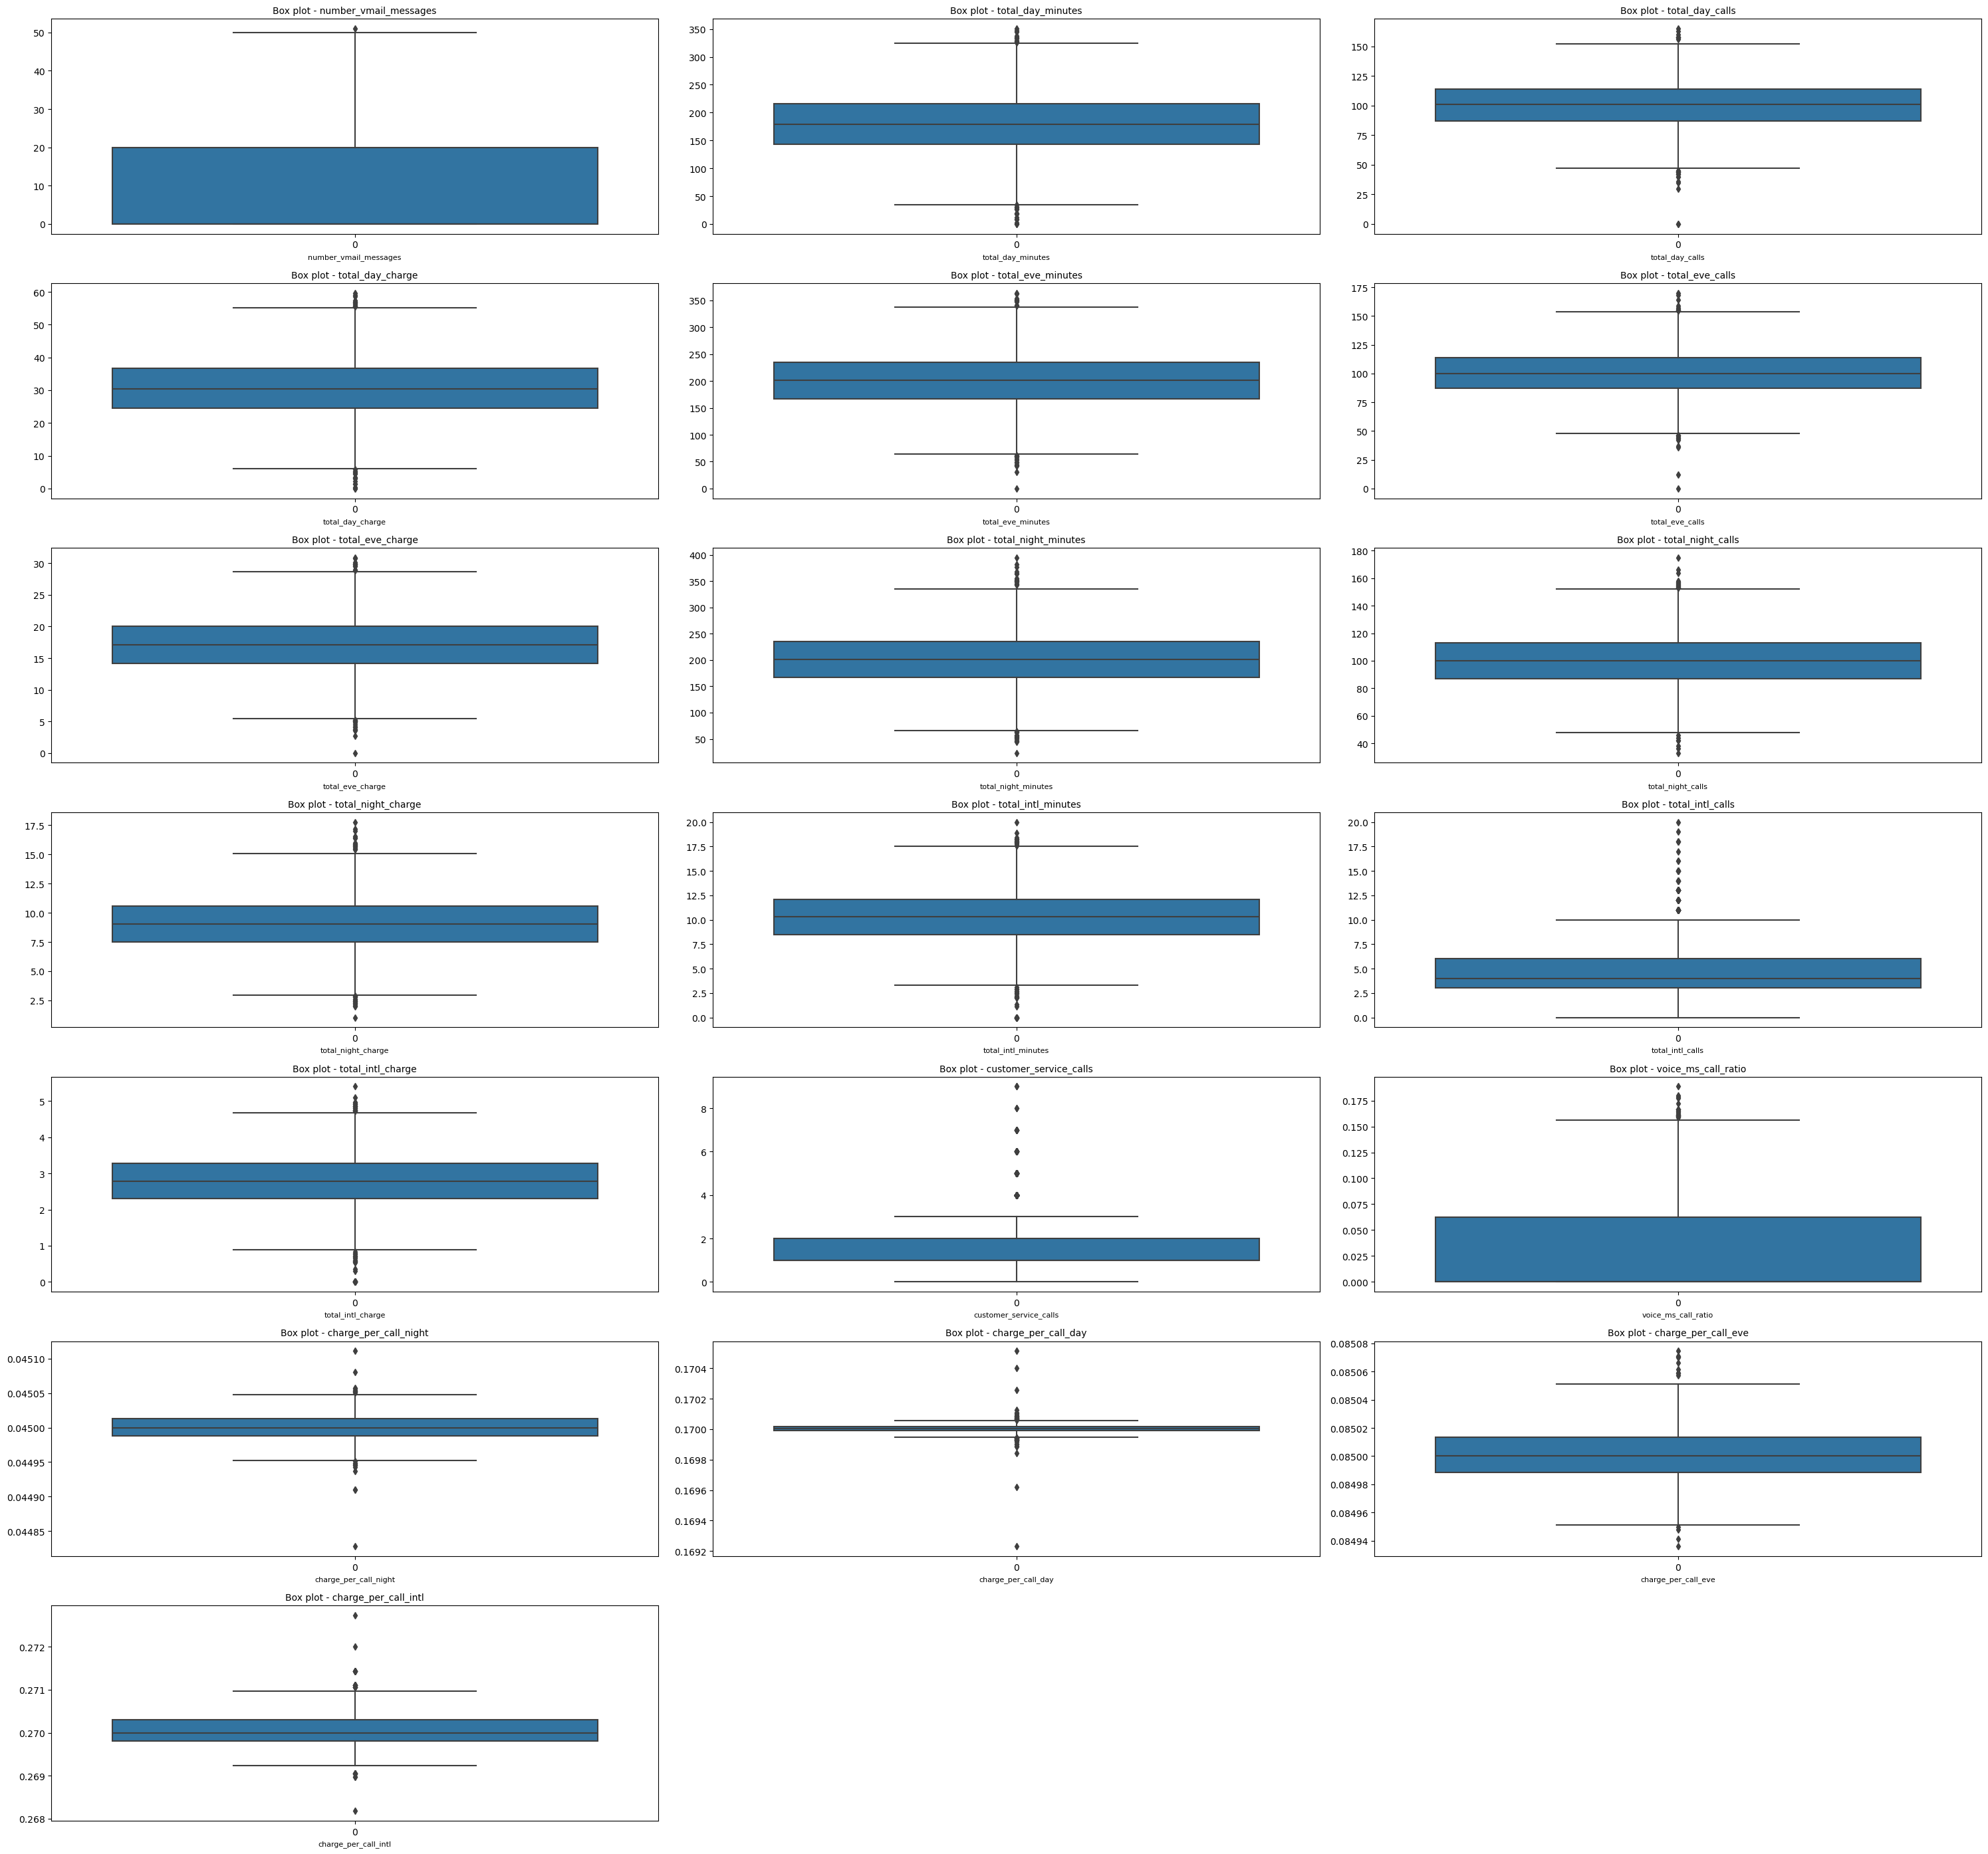

In [21]:
# Columns for our box plots
columns = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
           'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
           'total_night_minutes', 'total_night_calls', 'total_night_charge',
           'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
           'customer_service_calls', 'voice_ms_call_ratio','charge_per_call_night', 
           'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl']

# Calculate the required number of rows and columns for subplots
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each column
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot - {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Observation:  
Several variables show outliers, with some variables having more extreme outliers than others.  
Since we will mostly be using tree-based models like Decision Trees, Random Forests, which are very robust to outliers, there is no need to remove the outliers, and we can keep them.

### Checking if average total charges differ significantly between those who churned and those who didn't

We want to see if the average total charges differ significantly between customers who churned and those who didn’t.  
For this, a suitable statistical test would be the two-sample T-test.  
However, the two-sample T-test has the following assumptions:  
- Normality of the two groups (can be checked with the Shapiro-Wilk test).
- Equal variance between the groups (can be checked with Levene’s test).

We will start by performing the Shapiro-Wilk test and the Levene's test, to see whether the assumptions hold.

###### Shapiro-Wilk Test for Normality

**Hypotheses**  
- Null Hypothesis (H₀): The data follows a normal distribution.
- Alternative Hypothesis (H₁): The data does not follow a normal distribution.  

Interpreting the Results(We use an alpha value of 0.05):   
If p-value > 0.05 → Fail to reject H₀
  → The data is normally distributed.  
  
If p-value ≤ 0.05 → Reject H₀
  → The data is not normally distributed.  
Why is this important?
If normality holds, we can proceed with the Two-Sample T-Test. If not, we should consider a non-parametric alternative like the Mann-Whitney U Test.

###### Levene’s Test for Equal Variance

**Hypotheses**
- Null Hypothesis (H₀): The variances of both groups are equal.
- Alternative Hypothesis (H₁): The variances of both groups are not equal.  

Interpreting the Results:    

If p-value > 0.05 → Fail to reject H₀
  → Variances are equal.  
If p-value ≤ 0.05 → Reject H₀
  → Variances are not equal.

Checking those assumptions:

In [22]:
# Separate data into churned and non-churned groups
churned = df[df["churn"] == 1]["total_charge"]
not_churned = df[df["churn"] == 0]["total_charge"]

# 1. Normality test (Shapiro-Wilk)
shapiro_churned = stats.shapiro(churned)
shapiro_not_churned = stats.shapiro(not_churned)

print("Shapiro-Wilk Test for Normality:")
print(f"Churned: W = {shapiro_churned.statistic}, p = {shapiro_churned.pvalue}")
print(f"Not Churned: W = {shapiro_not_churned.statistic}, p = {shapiro_not_churned.pvalue}")

# 2. Variance test (Levene's test)
levene_test = stats.levene(churned, not_churned)
print("\nLevene's Test for Equal Variance:")
print(f"Statistic = {levene_test.statistic}, p = {levene_test.pvalue}")


Shapiro-Wilk Test for Normality:
Churned: W = 0.9526597857475281, p = 2.542687761730722e-11
Not Churned: W = 0.9927392601966858, p = 9.209515094976695e-11

Levene's Test for Equal Variance:
Statistic = 270.7304976260448, p = 1.5123194782301528e-58


###### **Results interpretation**  
From the above results:  

**Shapiro-Wilk Normality Test**:  
The p-values for both churned and not churned groups are below 0.05, meaning we reject the null hypothesis of normality. So, both groups are not normally distributed.  

**Levene’s Test for Equal Variance**:  
The p-value is less than 0.05, meaning we reject the null hypothesis of equal variance. So, the groups do not have equal variance.  

Since both assumptions do not hold, we cannot proceed with a Two-Sample (Independent) T-Test, and therefore have to use a non-parametric alternative, i.e. the Mann-Whitney U Test.

##### Performing the Mann-Whitney U Test  

**Hypothesis:**  
- Null Hypothesis (H₀): The mean total charge for churned and non-churned customers is the same, i.e. no significant difference.
- Alternative Hypothesis (H₁): The mean total charge for churned customers is different from non-churned customers.  

Since we’re testing for a difference (not specifically greater or lesser), this is a two-tailed test.  
We will also be using an alpha value of 0.05.

Performing the test:

In [23]:
# Run Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(churned, not_churned, alternative='two-sided')

# Output results
print(f"Mann-Whitney U Statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mann-Whitney U Statistic: 893437.5000
P-value: 0.0000


Since the p-value = 0.0000 (which is < 0.05), we reject the null hypothesis (H₀).  

Conclusion:
There is a statistically significant difference in total_charge between churned and non-churned customers. This suggests that total_charge may play an important role in determining churn.

#### Testing whether "international_plan" is associated with churn  
We can perform a chi square test for independence to test this.  
We'll first check the assumption that each expected frequency should be at least 5 for the test to be valid.  
If that assumption holds, then we'll perform the chi square test.  
We'll again be using an alpha value of 0.05.

**Hypothesis:**  
Null Hypothesis (H₀): There is no association between having an international plan and churn (they are independent).  

Alternative Hypothesis (H₁): There is an association between having an international plan and churn (they are dependent).

In [24]:
# Creating a contingency table
contingency_table = pd.crosstab(df["international_plan"], df["churn"])
print(contingency_table)

# Checking expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Expected Frequencies:\n", expected)

churn                  0    1
international_plan           
no                  2664  346
yes                  186  137
Expected Frequencies:
 [[2573.80738074  436.19261926]
 [ 276.19261926   46.80738074]]


In [25]:
# Performing the Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 222.5658
P-value: 0.0000


Since p < 0.05, we reject the null hypothesis.
This means there is a significant association between international_plan and churn.
Customers with an international plan may have different churn behavior compared to those without.

## Exploratory Data Analysis (EDA)

In [26]:
df.describe(include="all")

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_talk_time,total_calls,avg_call_duration,day_night_ratio,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3332.000000,3315.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,415,382-4657,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,591.864776,305.137114,1.964884,1.047618,0.026910,0.045000,0.170003,0.085001,0.270057
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,89.954251,34.448164,0.376958,0.323065,0.045928,0.000017,0.000028,0.000016,0.000329
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,284.300000,191.000000,0.798596,0.000000,0.000000,0.044828,0.169231,0.084936,0.268182
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,531.500000,282.000000,1.705187,0.826923,0.000000,0.044988,0.169989,0.084988,0.269811
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,593.600000,305.000000,1.939936,1.000000,0.000000,0.045000,0.170004,0.085000,0.270000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,652.400000,328.000000,2.195963,1.216867,0.062670,0.045013,0.170017,0.085013,0.270297


#### Distribution of customers per state

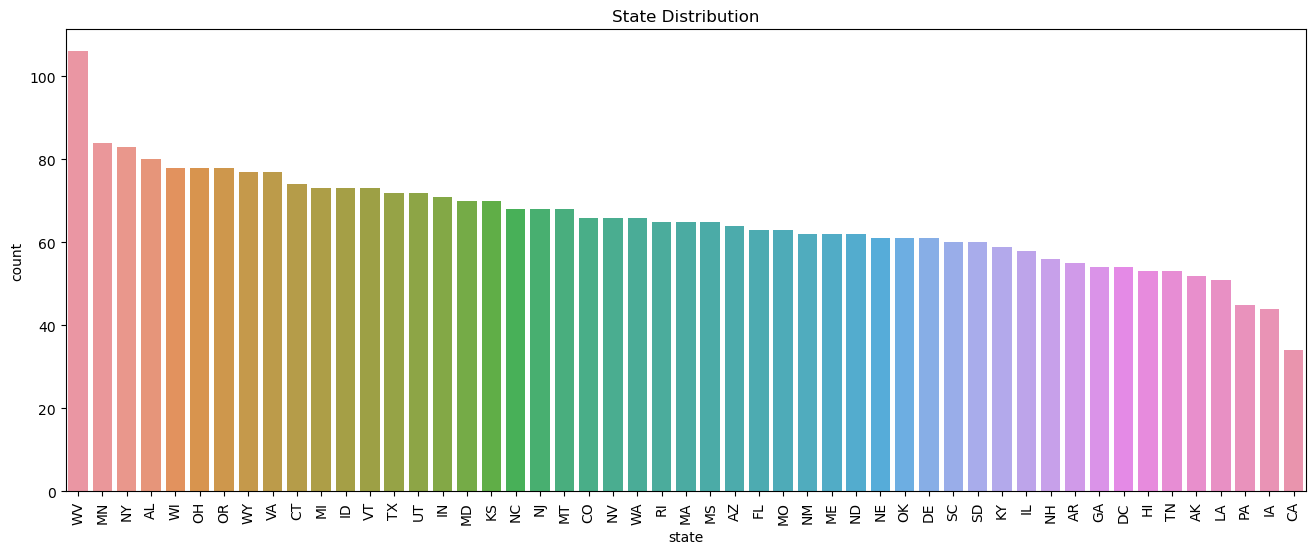

In [27]:
plt.figure(figsize=(16, 6))
order = df["state"].value_counts().index  # Get states sorted by count
sns.countplot(x="state", data=df, order=order)
plt.title("State Distribution")
plt.xticks(rotation=90)
plt.show()

* The state with the highest count is `WV` with 106 occurrences, indicating it is the most frequent state in the dataset.
* `MN` follows closely with 84 occurrences, making it the second most common state.
* `NY` comes next with 83 occurrences, showing a similar frequency to `MN`.
* `AL`,`WI`,`OR` and `OH` all have 78 occurrences, placing them among the top states in terms of frequency.
* The state with the lowest count is `CA` with only 34 occurrences, suggesting it is the least frequent state in the dataset.

#### Distribution of numerical features

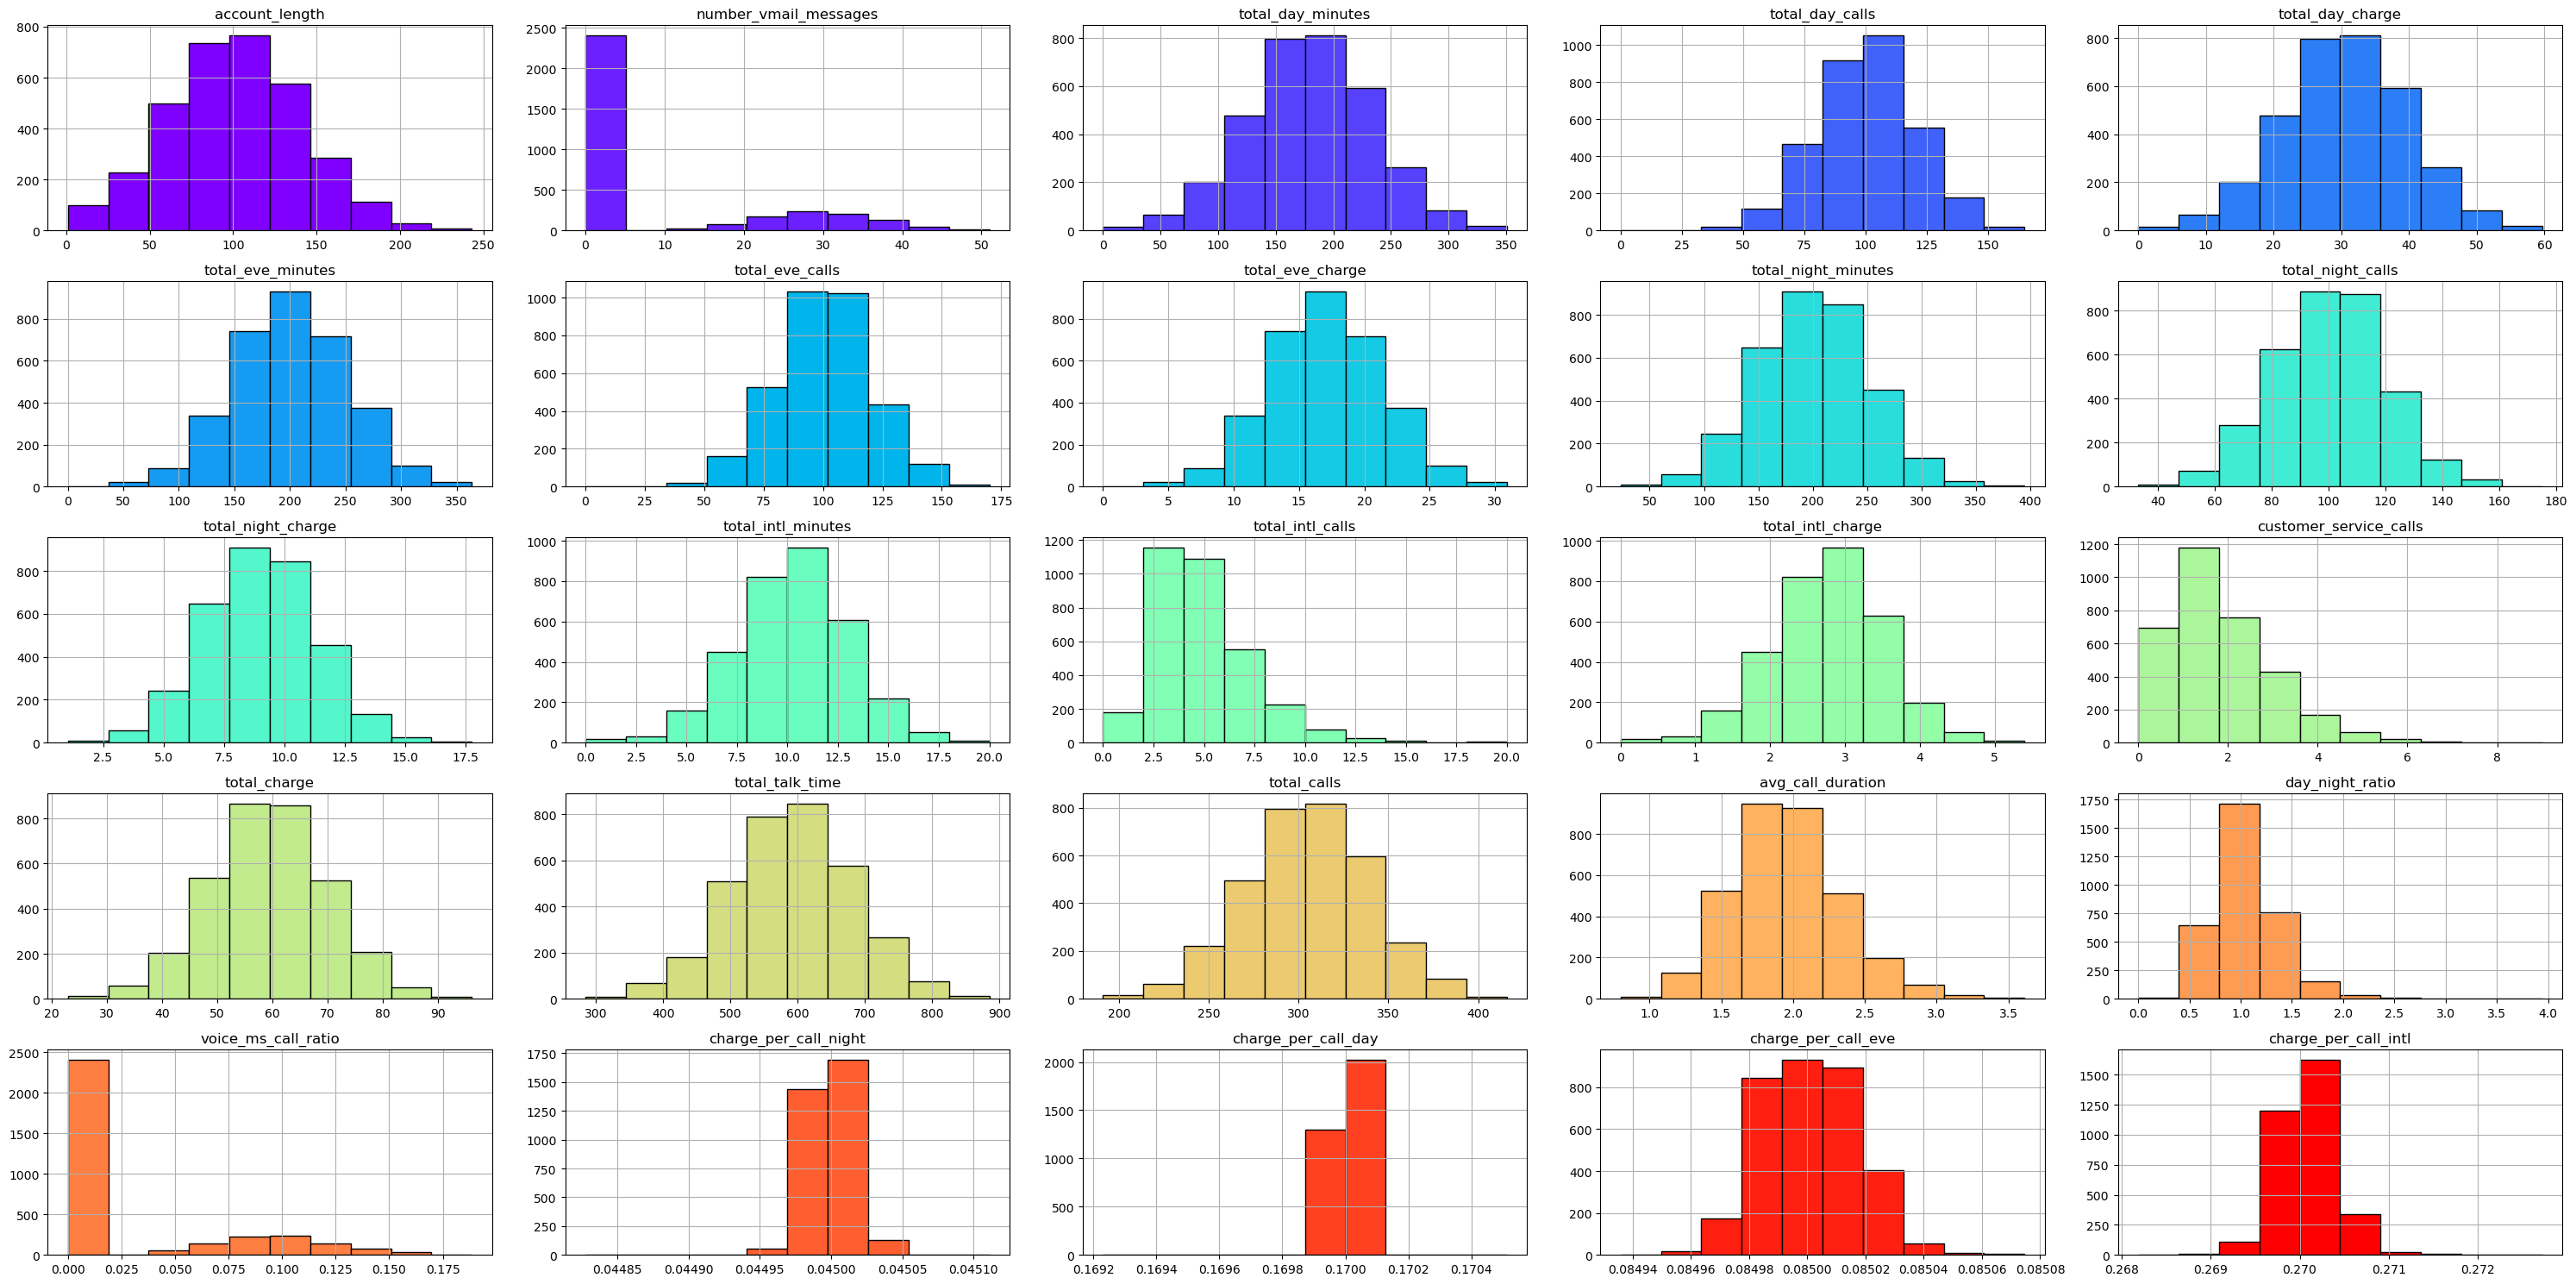

In [28]:
# Select only numerical columns and exclude specific ones
df_numerical = df.select_dtypes(include=[np.number])
columns_to_drop = ['phone_number', 'churn']
df_numerical = df_numerical.drop(columns=[col for col in columns_to_drop if col in df_numerical.columns])

cols = df_numerical.columns
n = len(cols)
colors = cm.rainbow(np.linspace(0, 1, n))

for i in range(0, n, 25):
    remaining = min(n - i, 25)
    rows = math.ceil(remaining / 5)
    fig, axs = plt.subplots(rows, min(5, remaining), figsize=(30,15))
    axs = np.ravel(axs)

    for j in range(remaining):
        col = cols[i + j]
        ax = axs[j]
        df_numerical[col].hist(edgecolor='black', color=colors[(i + j) % len(colors)], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

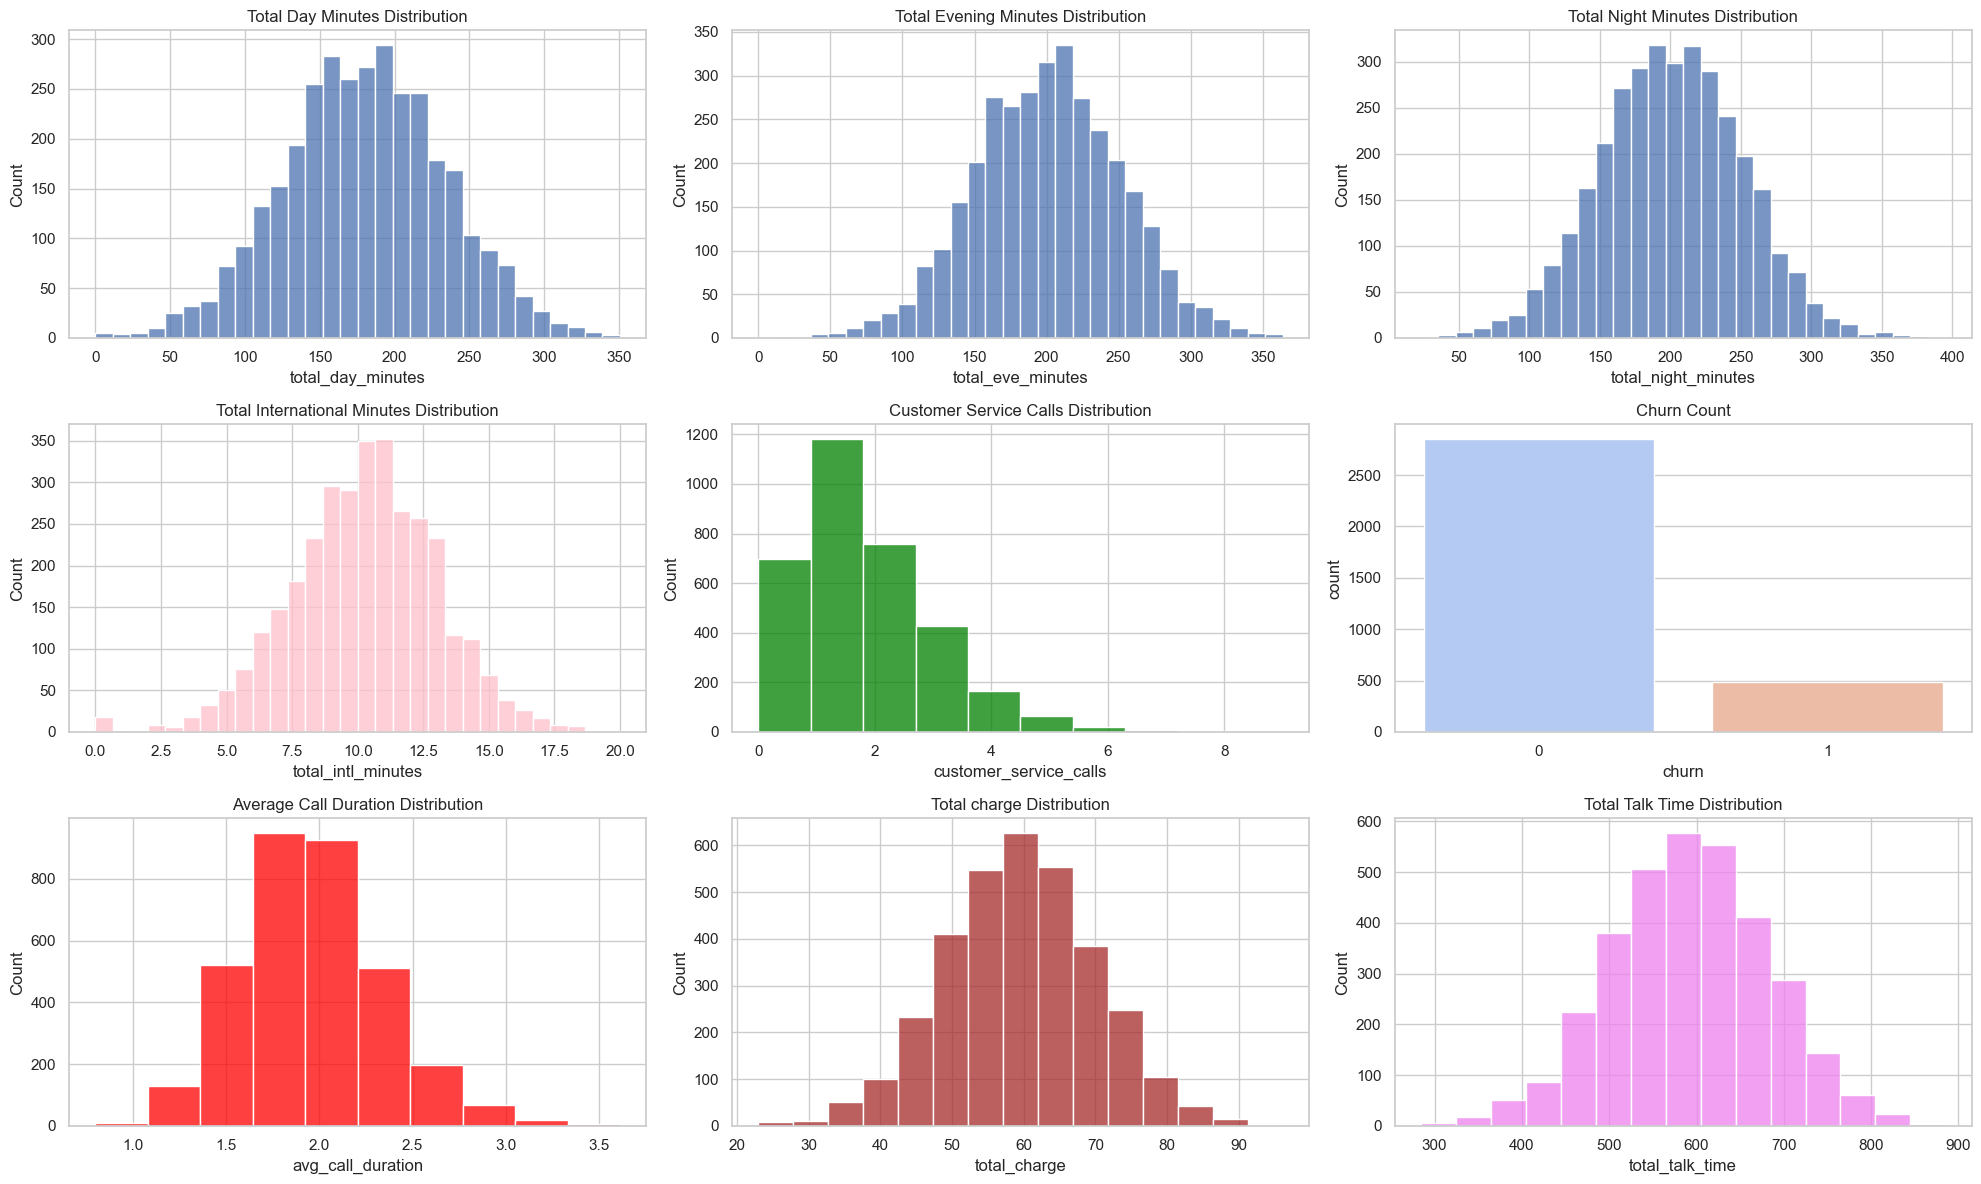

In [29]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(3, 3, figsize=(20, 12))

# Plot distribution of total day, eve, night, intl minutes and customer service calls
sns.histplot(df['total_day_minutes'], kde=False, ax=ax[0, 0], palette='deep', bins=30)
sns.histplot(df['total_eve_minutes'], kde=False, ax=ax[0, 1], palette='muted', bins=30)
sns.histplot(df['total_night_minutes'], kde=False, ax=ax[0, 2], palette='colorblind', bins=30)
sns.histplot(df['total_intl_minutes'], kde=False, ax=ax[1, 0], color='pink', bins=30)
sns.histplot(df['customer_service_calls'], kde=False, ax=ax[1, 1], color='green', bins=10)
sns.histplot(df['avg_call_duration'], kde=False, ax=ax[2, 0], color='red', bins=10)
sns.histplot(df['total_charge'], kde=False, ax=ax[2, 1], color='brown', bins=15)
sns.histplot(df['total_talk_time'], kde=False, ax=ax[2, 2], color='violet', bins=15)

# Plot churn count
sns.countplot(x='churn', data=df, ax=ax[1, 2], palette='coolwarm')

# Set plot titles
ax[0, 0].set_title('Total Day Minutes Distribution')
ax[0, 1].set_title('Total Evening Minutes Distribution')
ax[0, 2].set_title('Total Night Minutes Distribution')
ax[1, 0].set_title('Total International Minutes Distribution')
ax[1, 1].set_title('Customer Service Calls Distribution')
ax[2, 0].set_title('Average Call Duration Distribution')
ax[2, 1].set_title('Total charge Distribution')
ax[2, 2].set_title('Total Talk Time Distribution')
ax[1, 2].set_title('Churn Count')

# Show the plot
plt.tight_layout()
plt.show()

From the visualizations of the distributions of some numerical variables and the churn count:
- The total day minutes seem to be normally distributed, with most customers having around 175 to 200 total day minutes.
- Similarly, the total evening minutes also appear to be normally distributed, with most customers having around 200 total evening minutes.
- The total night minutes also follow a similar distribution, with the majority of customers having around 200 total night minutes.
- The total international minutes seem to have a slightly left-skewed distribution.   Most customers have about 10 total international minutes.
- Most customers have made 1 or 2 customer service calls, while very few have made more than 4 calls.
- The majority of customers have not churned (indicated by False), while a smaller number of customers have churned (indicated by True).


#### Distribution of categorical variables

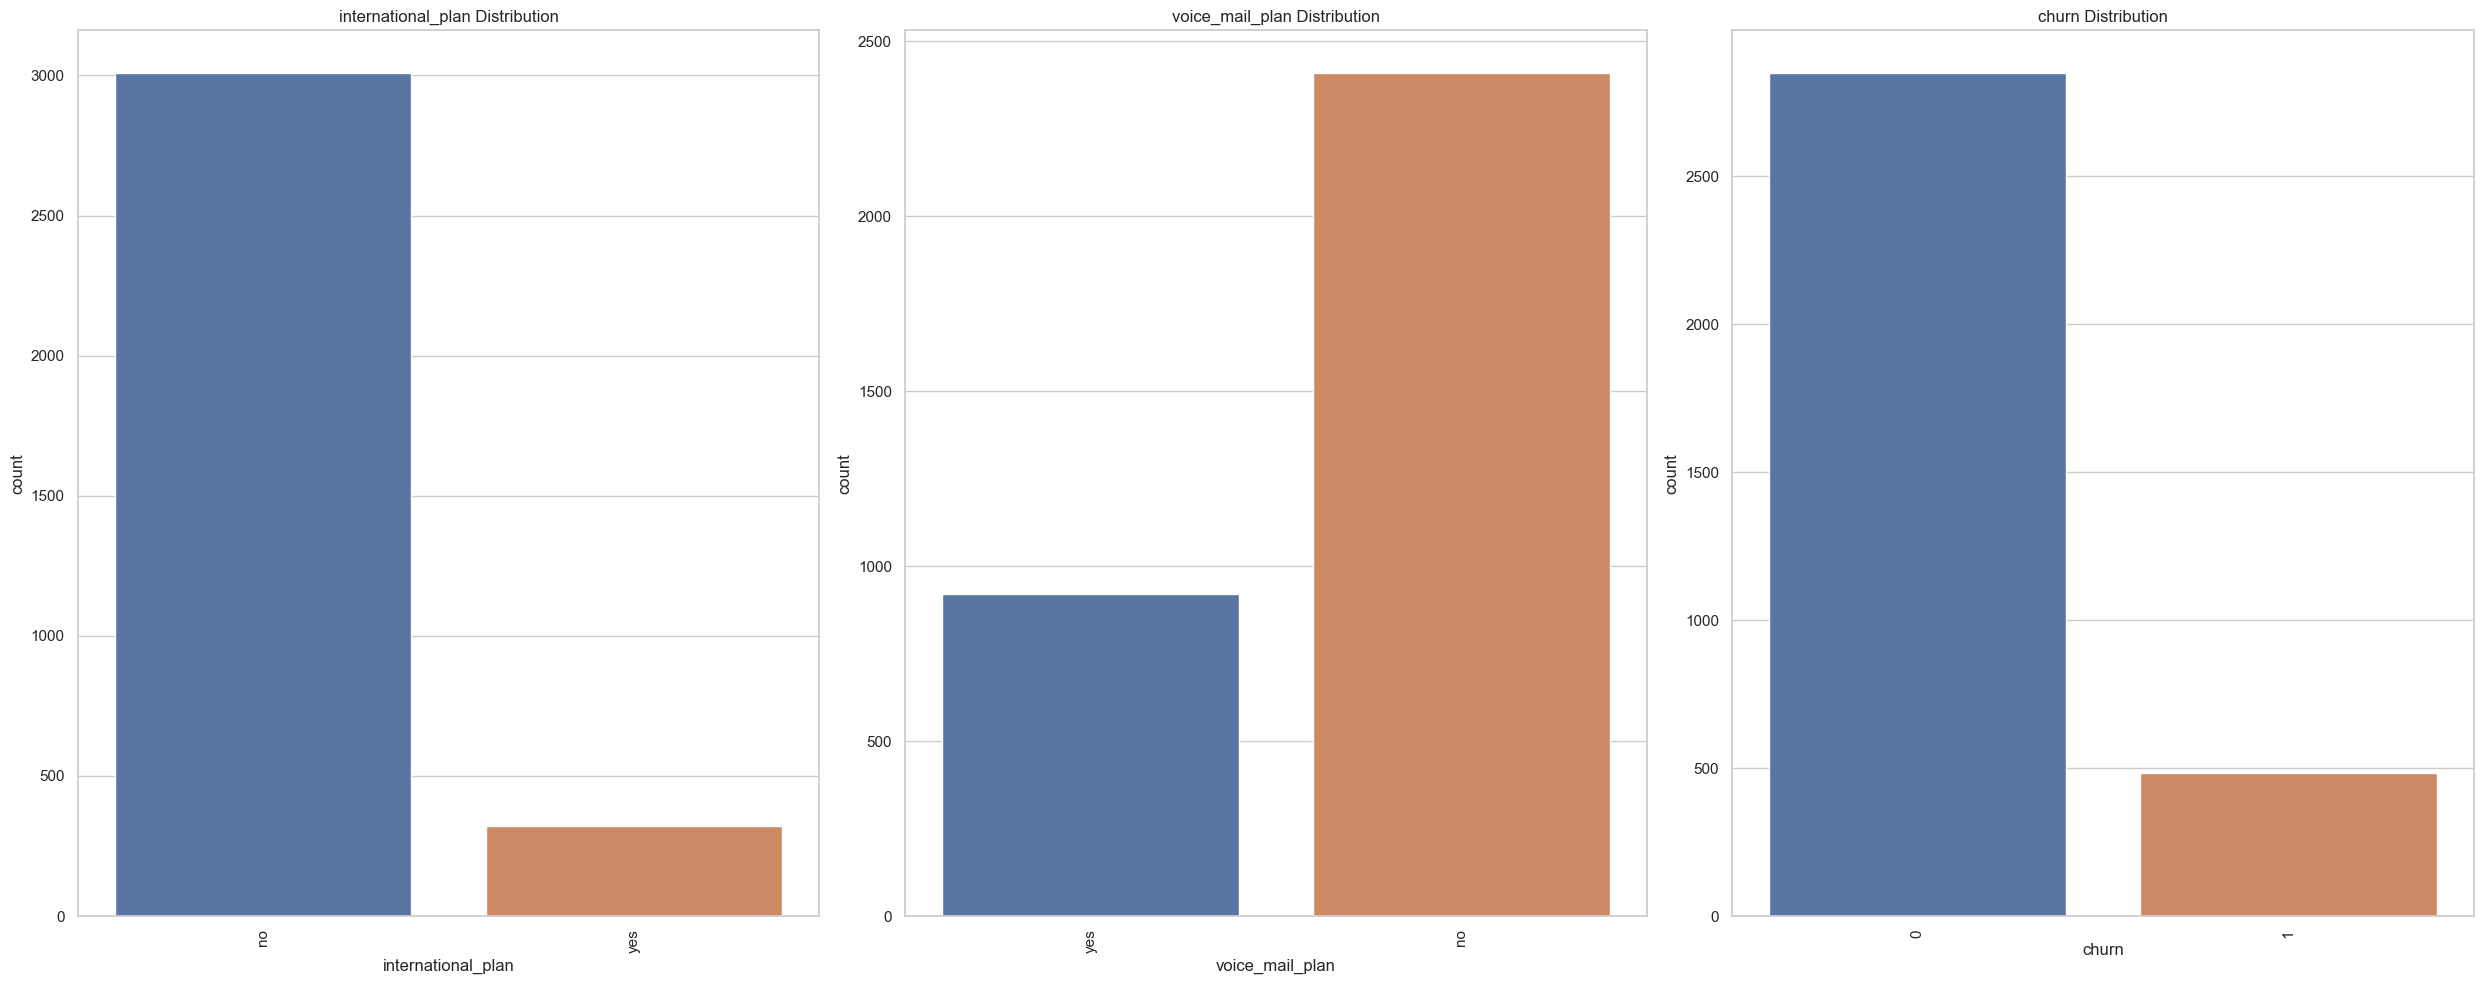

In [30]:

# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

# Calculate value counts and plot bar plots for categorical variables
categorical_cols = ["international_plan", "voice_mail_plan", "churn"]

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f"{col} Distribution")
    axs[i].tick_params(axis='x', rotation=90)

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

* The data indicates that the majority of observations, approximately 85.5%, represent customers who did not churn. A smaller subset, comprising approximately 14.5% of the observations, represents customers who churned. These percentages highlight the imbalance in churn behavior, with a significant majority of customers demonstrating loyalty by not churning.
* The majority of customers, approximately 73% (2411 occurrences), do not have a voice mail plan.A subset of customers, approximately 27% (922 occurrences), have opted for a voice mail plan.
* The majority of customers, accounting for 3010 occurrences, do not have an international plan. Conversely, there is a smaller subset of 323 customers who have opted for an international plan.

### Bivariate Analysis

#### Distribution of churn for each state

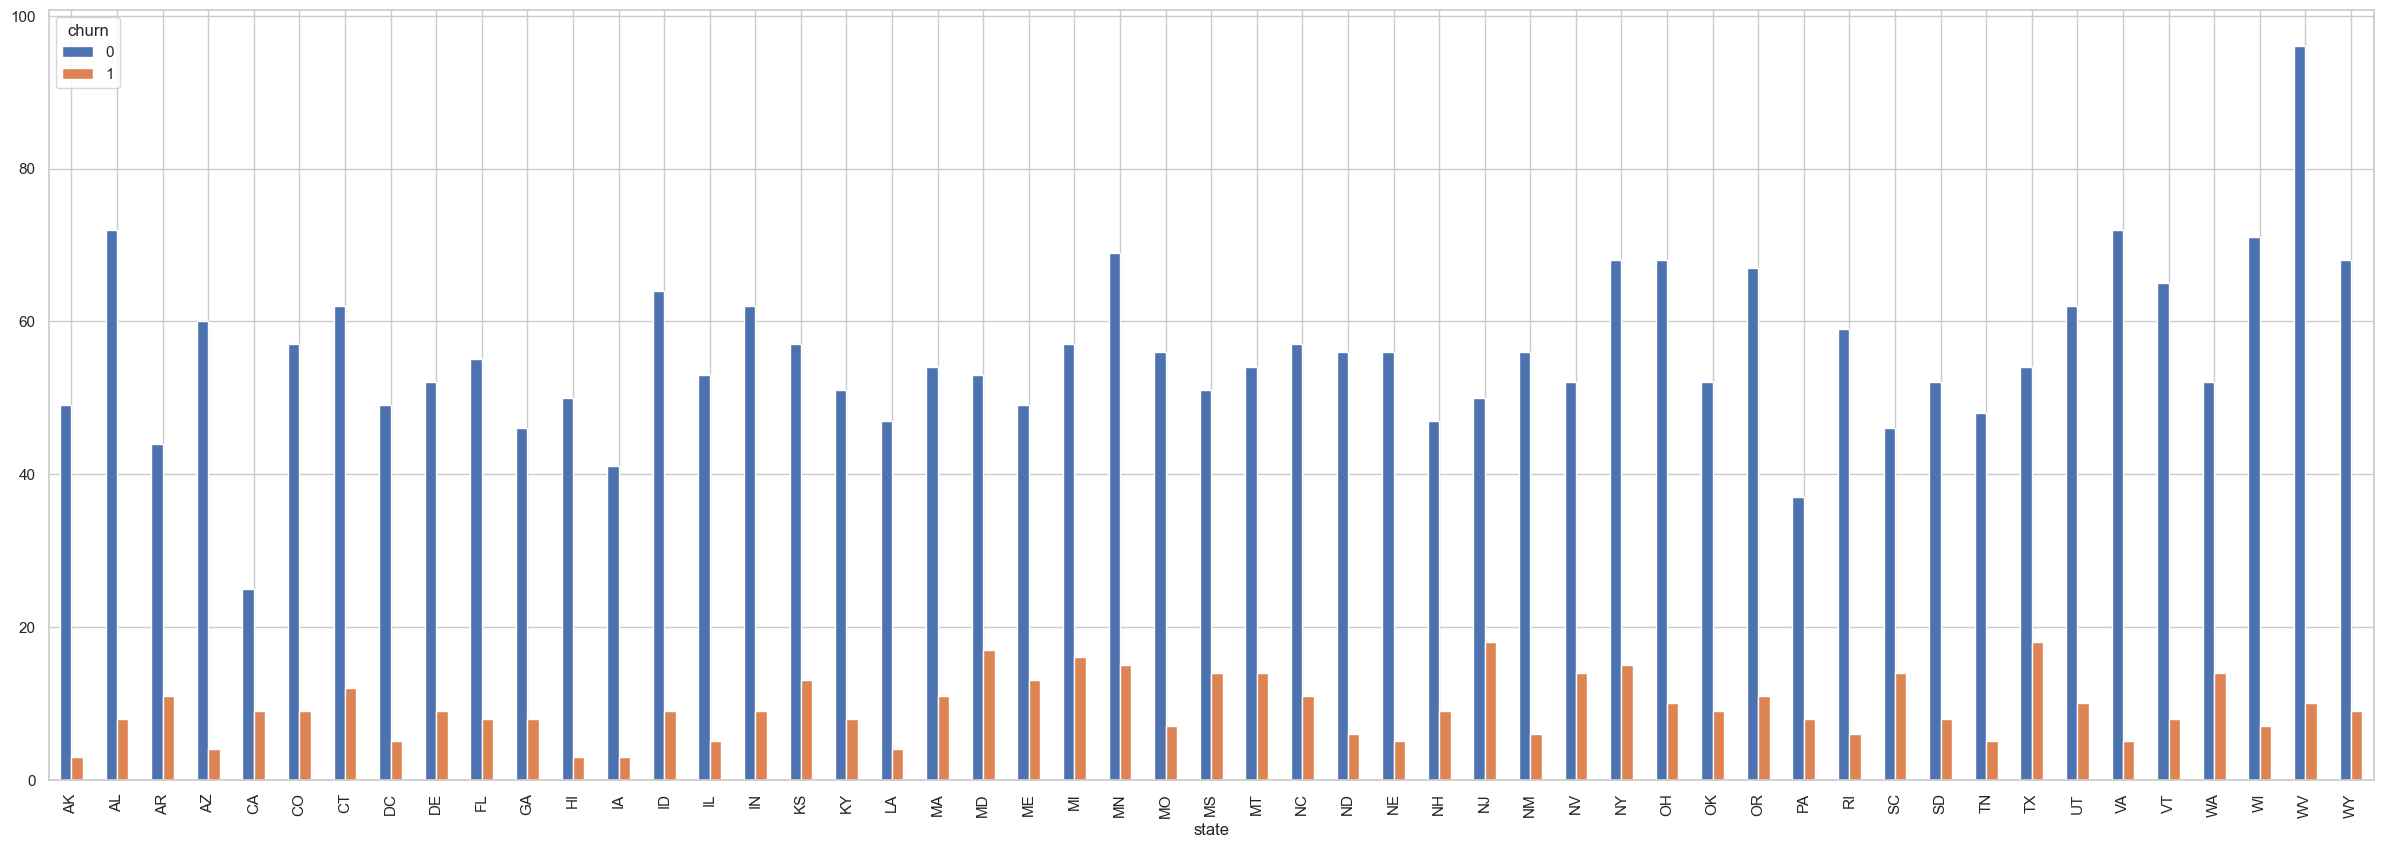

In [31]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(30,10));

The plot above shows the distribution of churn for each state.
- Some states have relatively higher churn rates like WV, VT, NY, OH with a significant number of churned customers (churn 1) while other states have lower churn rates like AR, AZ, CA, CO with a higher count of customers who did not churn (churn 0)

#### Churn by categorical features

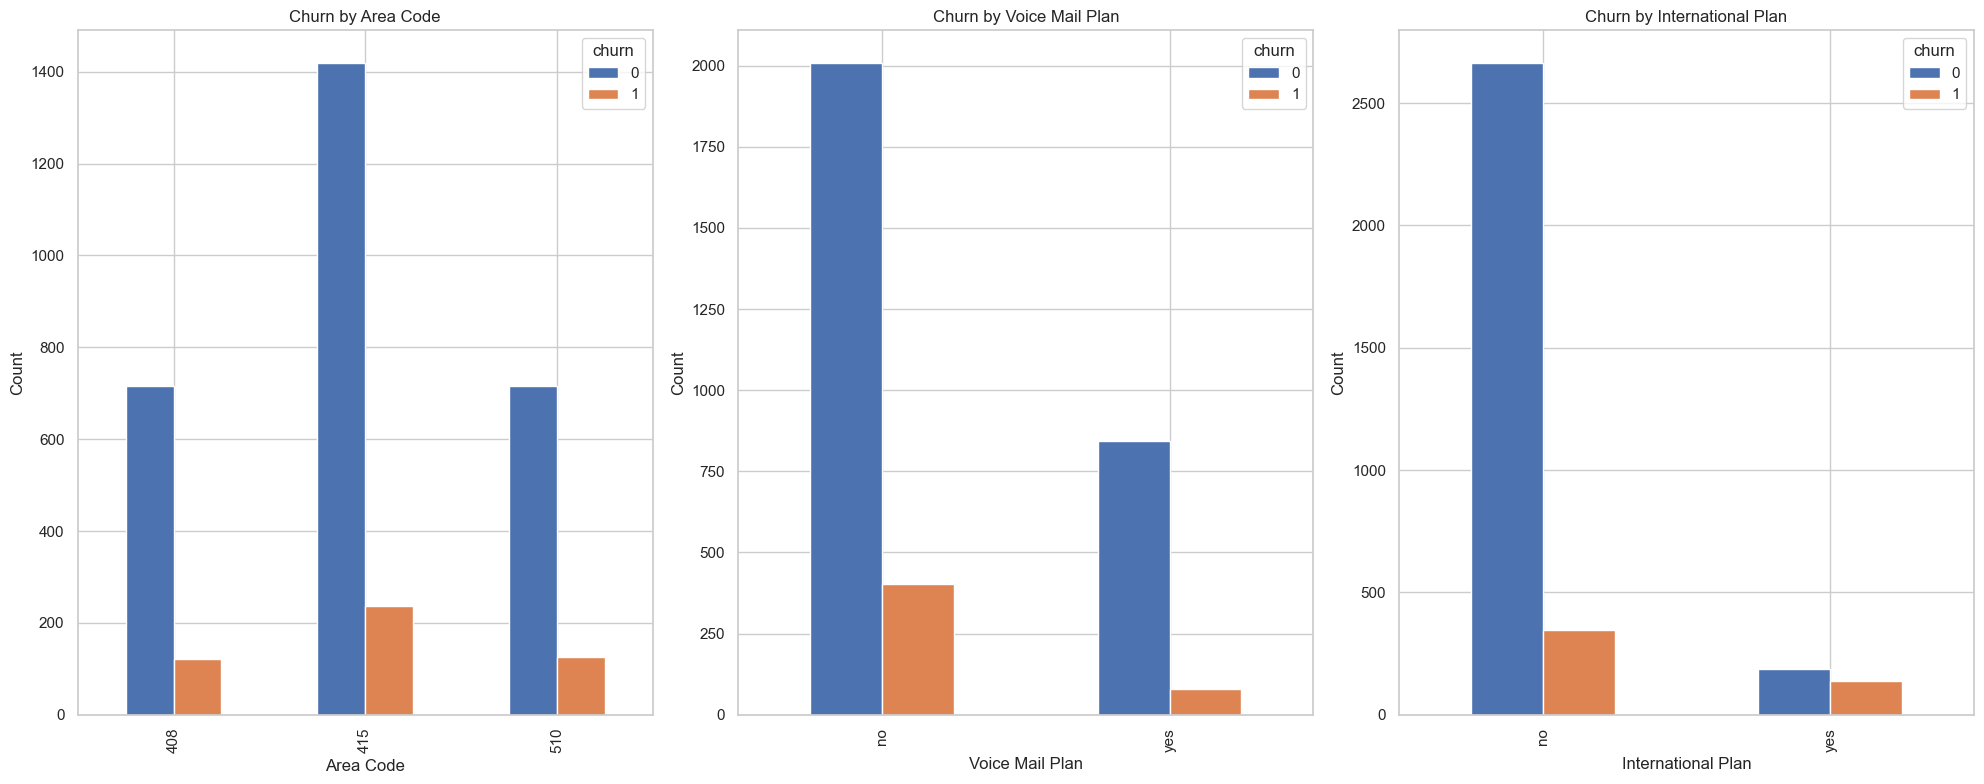

In [32]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Group by "area code" and "churn", then unstack and plot
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by "voice mail plan" and "churn", then unstack and plot
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by "international plan" and "churn", then unstack and plot
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

* Churn rates vary between the different area codes, with area code 415 having the highest churn rate and area code 408 having the lowest churn rate
* Customers without a voice mail plan had a higher churn rate compared to customers with a voice mail plan
* Customers without an international plan had a higher churn rate compared to customers with an international plan

### Multivariate

#### Correlation Heatmap

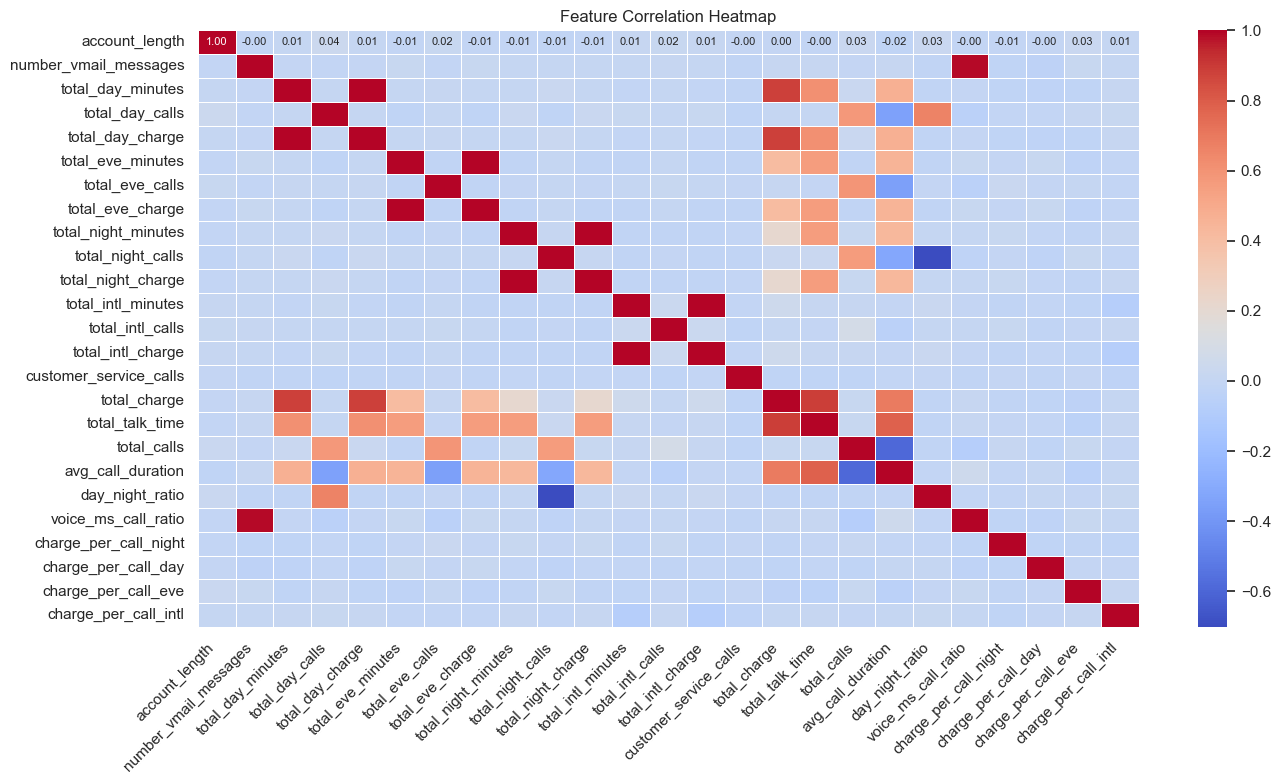

In [33]:
plt.figure(figsize=(14, 8))  # Increase figure size
sns.heatmap(df_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout
plt.show()


The correlation heatmap reveals strong positive correlations between certain features, indicating that some variables are directly proportional and likely derived from each other. There are also moderate correlations suggesting relationships between call duration, total calls, and overall charges. Some features exhibit weak or no correlation, implying independence from other variables. Additionally, a few negative correlations suggest inverse relationships between certain usage metrics. Overall, the heatmap helps identify redundant features and key interactions that could inform further analysis

#### Pairplot of top features vs churn

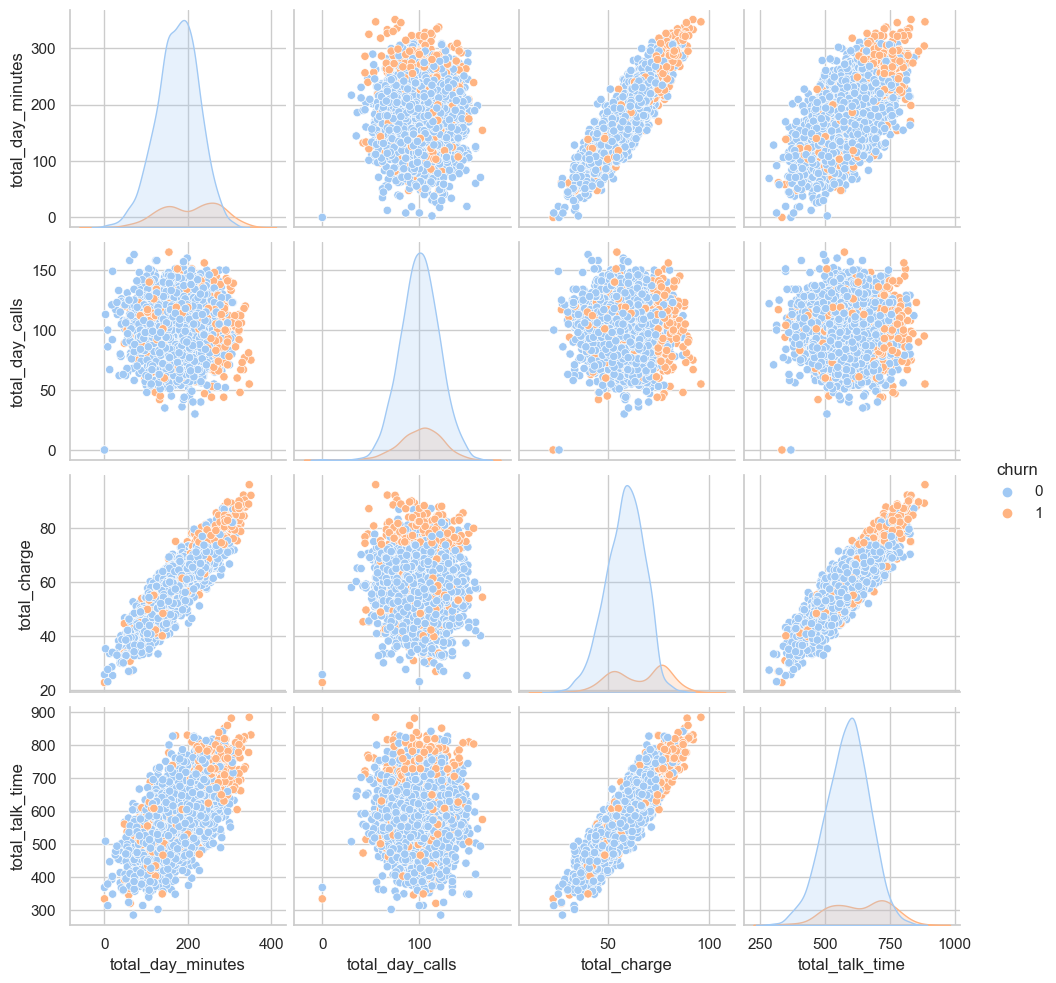

In [34]:
top_features = ["total_day_minutes", "total_day_calls", "total_charge", "total_talk_time", "churn"]
sns.pairplot(df[top_features], hue="churn", palette="pastel")
plt.show()

This pair plot provides insights into relationships between numerical features while distinguishing between churned (orange) and non-churned (blue) customers. Strong linear relationships are evident between features like total_day_minutes and total_charge, suggesting direct proportionality. The distribution plots along the diagonal indicate differences in feature distributions between churned and non-churned customers, with churned users appearing to have slightly different usage patterns. Scatter plots reveal that churned customers may be more spread across certain feature ranges, which could indicate potential patterns in customer behavior that contribute to churn.

## Data Preprocessing

### Checking highly correlated features

In [35]:
## Defining a function to check highly correlated features
def check_multicollinearity(df, threshold=0.8):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)

total_day_charge --- total_day_minutes
total_night_charge --- total_night_minutes
number_vmail_messages --- voice_ms_call_ratio
total_intl_charge --- total_intl_minutes
total_eve_charge --- total_eve_minutes
total_charge --- total_day_minutes
total_charge --- total_talk_time
total_charge --- total_day_charge


In [36]:
# Drop some columns in order to deal with multicollinearity
features= ['number_vmail_messages', 'total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge', 'total_eve_charge',
       'total_night_charge', 'total_intl_minutes']
df =df.drop(features,axis=1)
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_talk_time,total_calls,avg_call_duration,day_night_ratio,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
0,KS,128,415,382-4657,no,yes,110,99,91,3,2.70,1,0,75.56,717.2,303,2.366997,1.208791,0.082508,0.044994,0.170011,0.085005,0.270000
1,OH,107,415,371-7191,no,yes,123,103,103,3,3.70,1,0,59.24,625.2,332,1.883133,1.194175,0.078313,0.045008,0.169988,0.085013,0.270073
2,NJ,137,415,358-1921,no,no,114,110,104,5,3.29,0,0,62.29,539.4,333,1.619820,1.096154,0.000000,0.045018,0.170008,0.084983,0.269672
3,OH,84,408,375-9999,yes,no,71,88,89,7,1.78,2,0,66.80,564.8,255,2.214902,0.797753,0.000000,0.044997,0.170007,0.084976,0.269697
4,OK,75,415,330-6626,yes,no,113,122,121,3,2.73,3,0,52.09,512.0,359,1.426184,0.933884,0.000000,0.044997,0.170006,0.085030,0.270297


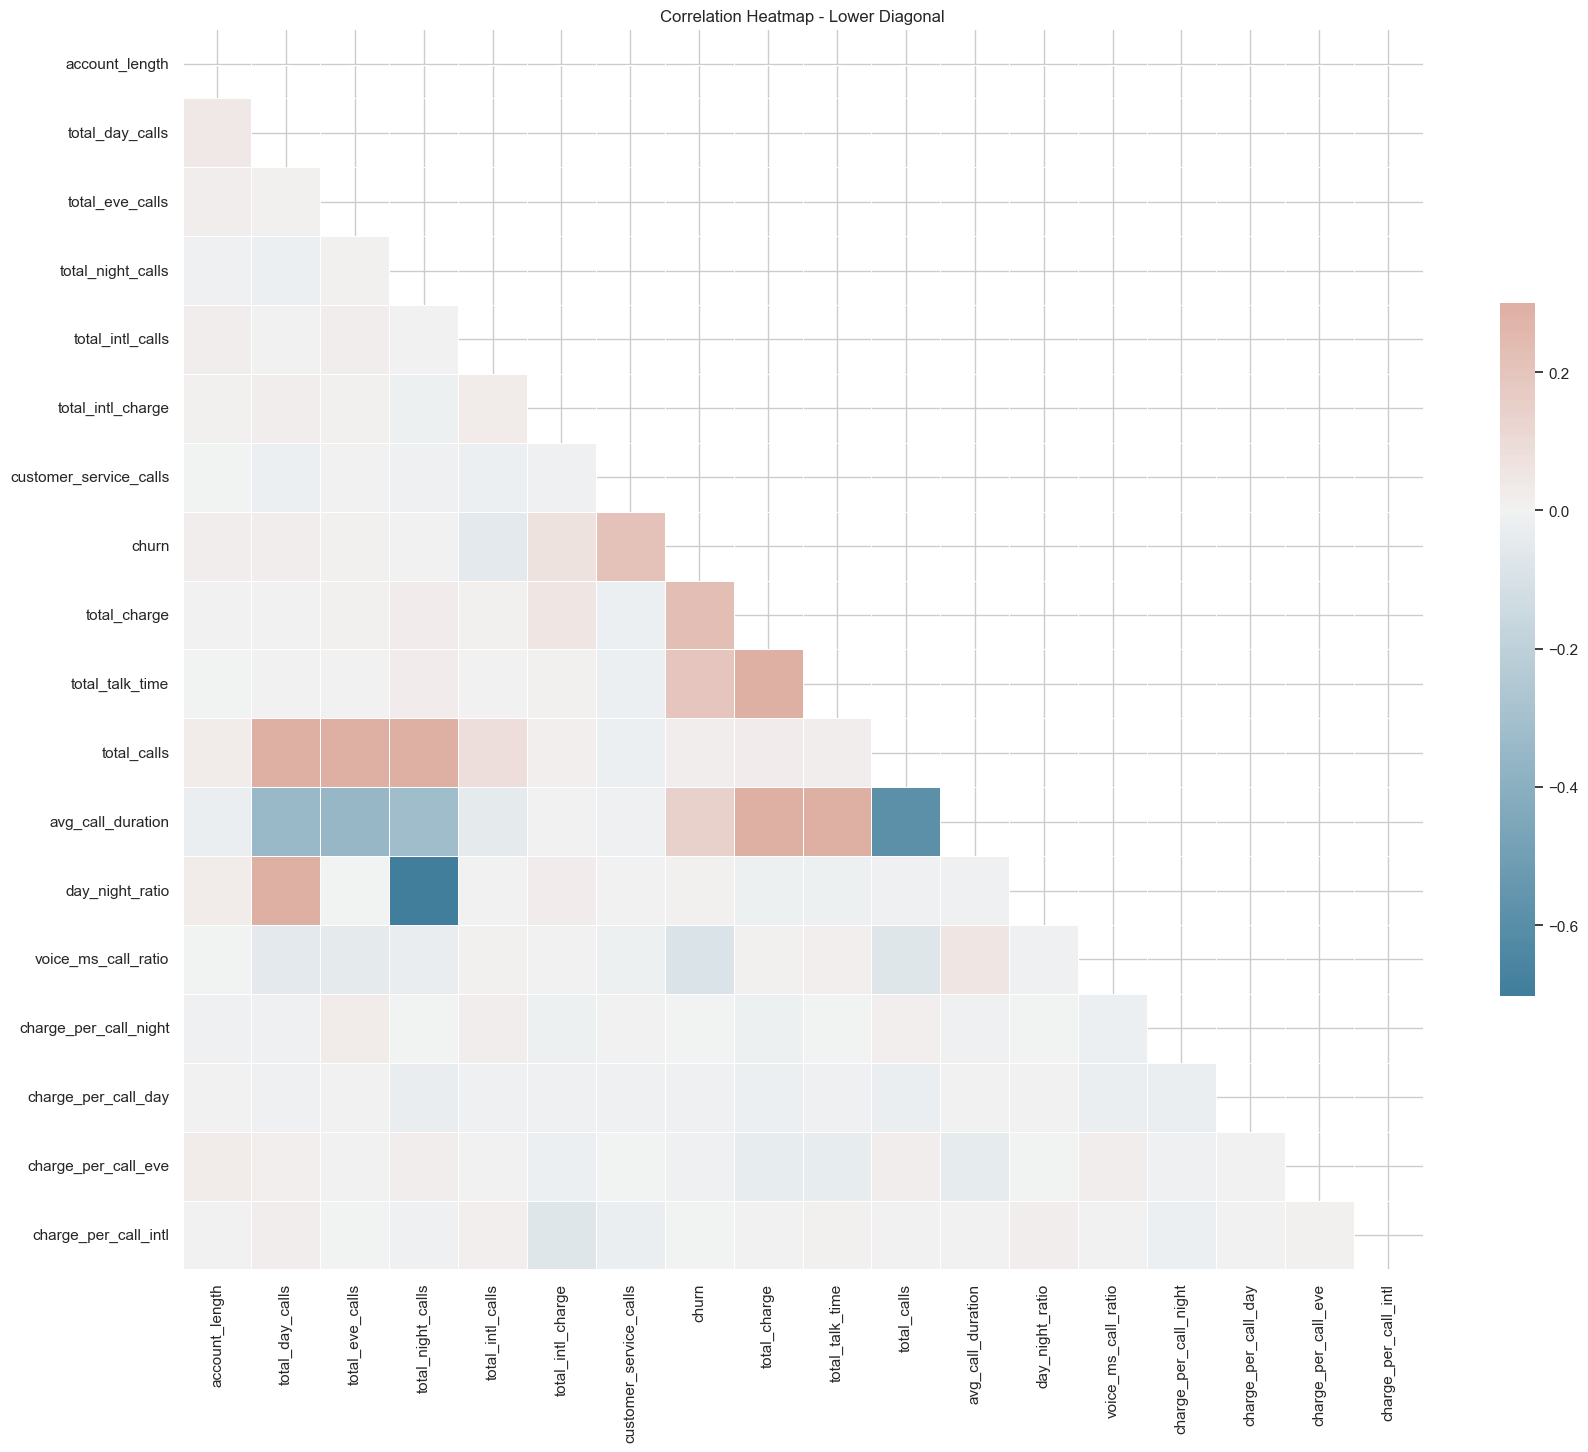

In [37]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show()

* Blue shades: Represent negative correlations, with darker blue indicating stronger negative correlation.
* White: Represents zero correlation.
* Red shades: Represent positive correlations, with darker red indicating stronger positive correlation.
In this color scheme, the strongest negative correlations are represented by the darkest blue, and the strongest positive correlations are represented by the darkest red. The center (white) represents variables with no correlation (correlation coefficient close to zero).

#### Scaling and encoding

In [37]:
#Dropping phone number since it does not add any value to modelling since all  values are unique
df = df.drop('phone_number', axis=1)
df.dropna(inplace=True)

# Define numerical and categorical features
num_features = ['account_length','customer_service_calls','total_charge',
       'total_talk_time', 'total_calls', 'day_night_ratio', 'voice_ms_call_ratio', 'charge_per_call_night', 'charge_per_call_day',
       'charge_per_call_eve']
cat_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

## Modeling

### Splitting the data

Churn is the target variable which we are aiming to predict.

In [38]:
# unique values of the target variable
df['churn'].value_counts()

churn
0    2830
1     482
Name: count, dtype: int64

In [39]:
# Checking for the percentage of Churners and non-churners.
df.churn.value_counts(normalize=True)*100

churn
0    85.44686
1    14.55314
Name: proportion, dtype: float64

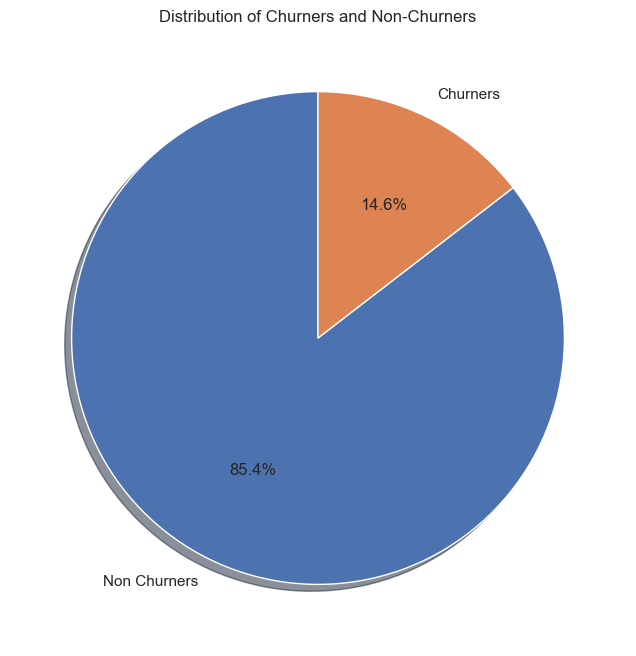

In [40]:
#pie chart showing the distribution percentage of churners and non-churners
plt.figure(figsize=(8,8))
plt.pie(df.churn.value_counts(), labels=['Non Churners', 'Churners'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Churners and Non-Churners')
plt.show()

There are approximately 85.5% are non-churners, while about 14.5% are churners.This class imbalance will be handled using SMOTE (Synthetic Minority Over-sampling Technique ).

In [41]:
# Define the target variable
y = df['churn']

# Drop the target variable from the feature set
X = df.drop(['churn'], axis=1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2649, 71), (663, 71), (2649,), (663,))

In [42]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Baseline Model: Decision tree

In [43]:
# Create an instance of the decision tree classifier and fit the model on the training data
clf = DecisionTreeClassifier(random_state=42)

In [44]:
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

##### Evaluating the decision tree before tuning

In [46]:
# Defining a function to evaluate performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training data
    y_train_pred = model.predict(X_train)

    # Predict on the test data
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # Calculate recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate F1-score
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print evaluation metrics
    print("Training Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        train_accuracy, train_precision, train_recall, train_f1
    ))
    print("Test Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        test_accuracy, test_precision, test_recall, test_f1
    ))

In [47]:
# Model evaluation
evaluate_model(clf, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9472, Precision: 0.8211, Recall: 0.8125, F1-score: 0.8168


##### Tuning the decision tree model

Determine the optimal hyperparameters for the decision tree model using techniques like grid search.

In [48]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 7,10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
}

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_resampled,y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [49]:
# Use the best model found for predictions
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

##### Evaluating the Decision tree model after tuning

In [50]:
# Evaluate tuned decision tree model
evaluate_model(best_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Training Data - Accuracy: 0.9848, Precision: 0.9991, Recall: 0.9704, F1-score: 0.9845
Test Data - Accuracy: 0.9367, Precision: 0.7411, Recall: 0.8646, F1-score: 0.7981


Confusion Matrix:
[[538  29]
 [ 13  83]]


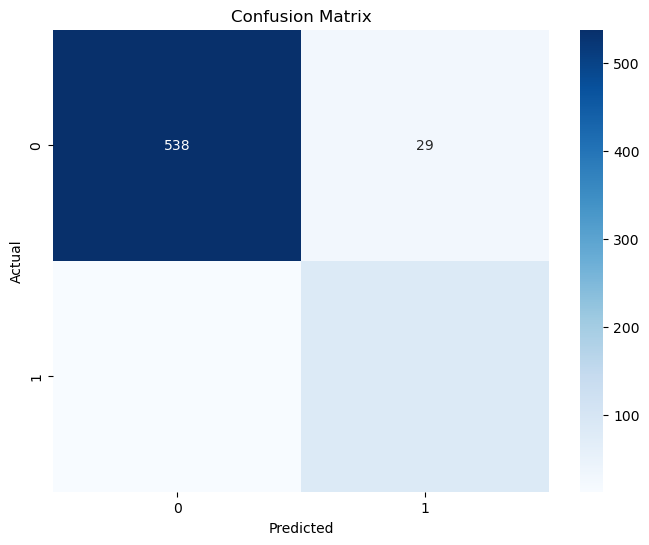

In [67]:
# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_predd)
print("Confusion Matrix:")
print(confusion_mat)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

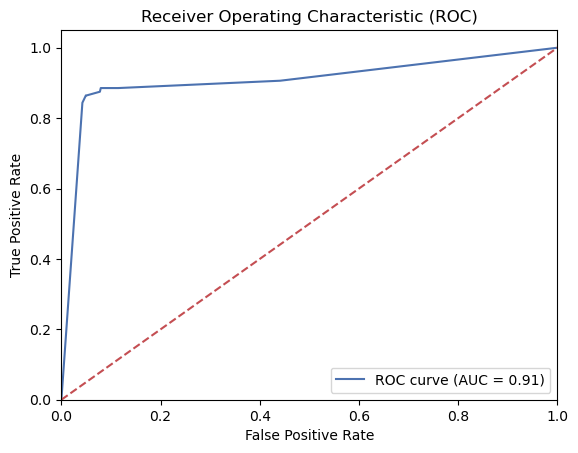

In [68]:
# Obtain predicted probabilities for the positive class
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)


# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

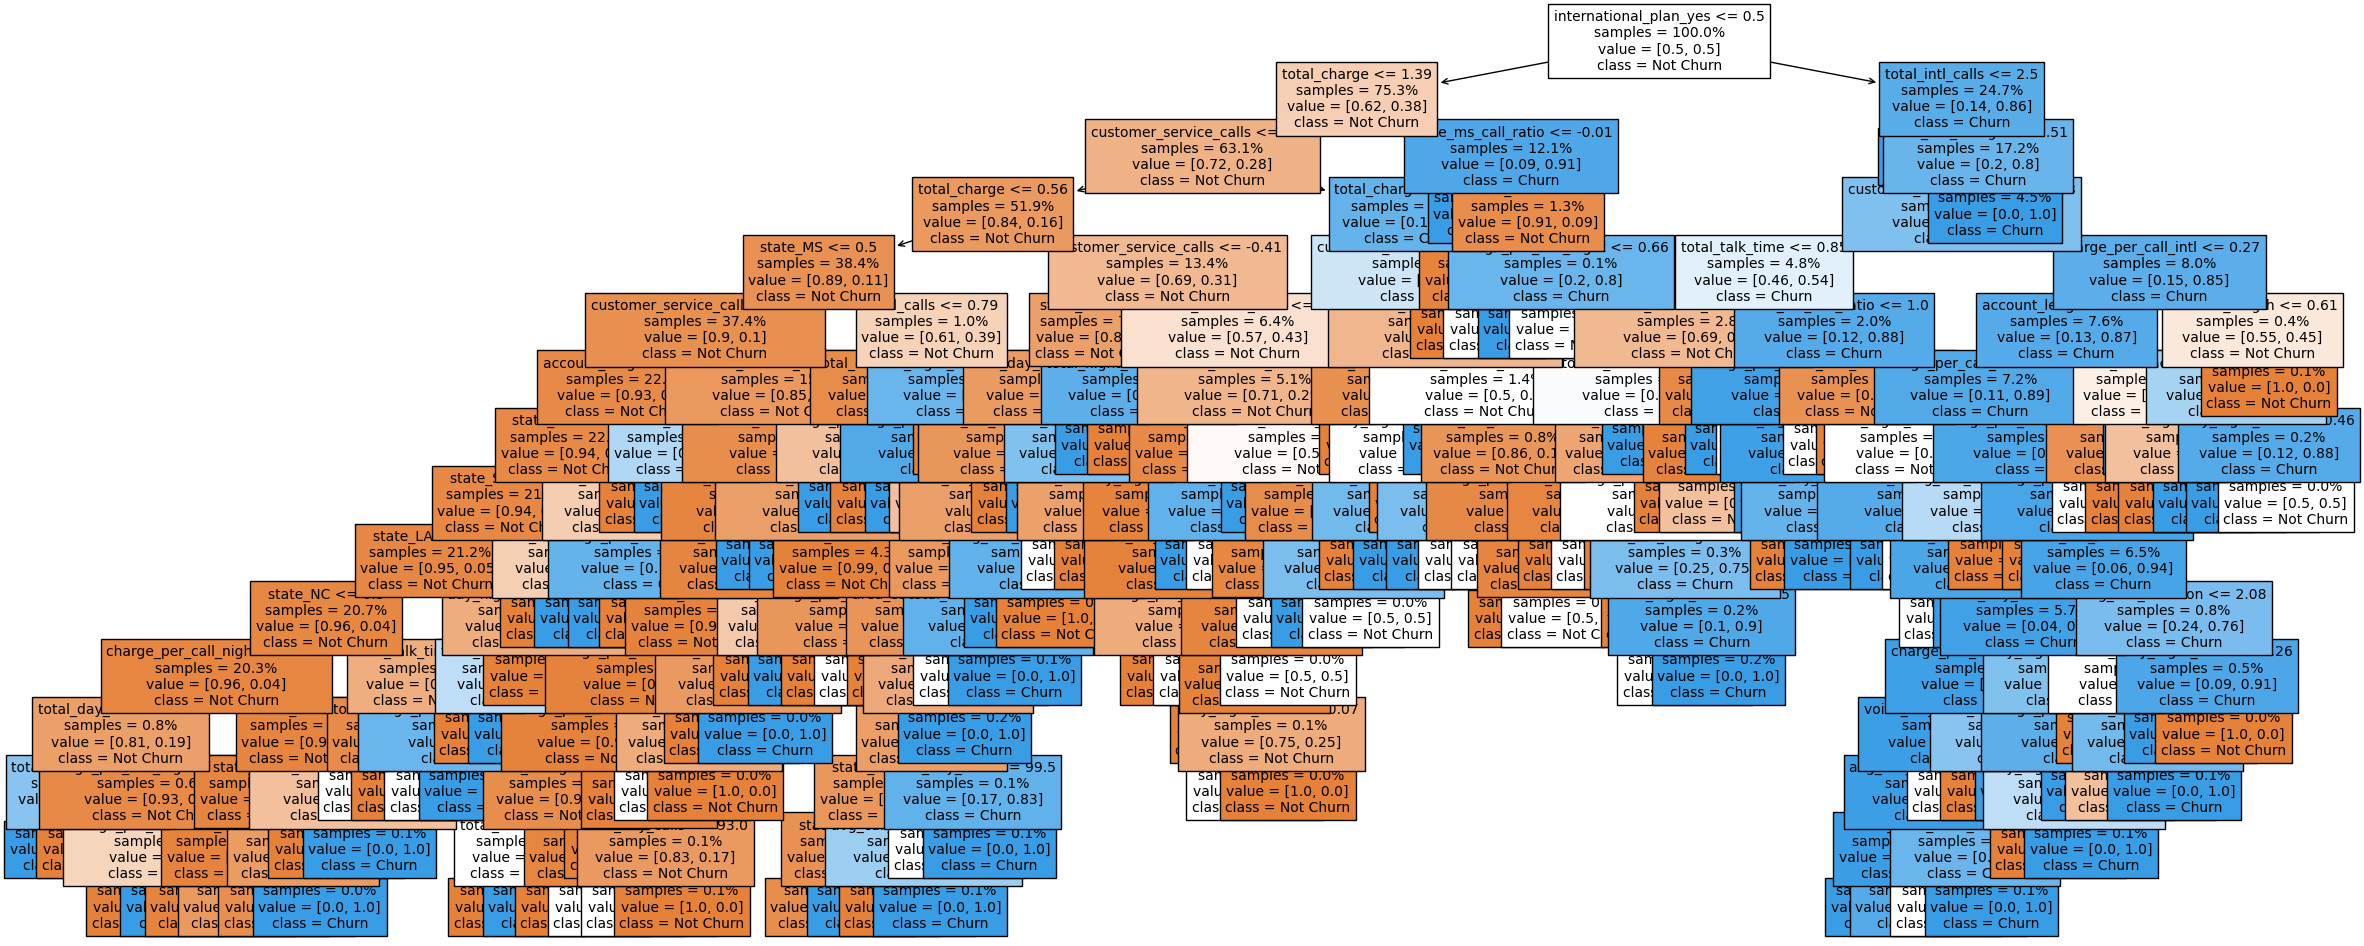

In [69]:
# Visualize the decision tree
plt.figure(figsize=(29, 12))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], fontsize=10, impurity=False, precision=2, proportion=True)
plt.show()

Before tuning, the Decision Tree model was able to correctly identify 81.25% of churn cases (recall) and of all instances it predicted as churn, 82.11% were correct (precision). The model was accurate in 94.72% of all predictions (accuracy) and had a balanced F1-score of 81.68% considering both precision and recall.

After hyperparameter tuning, the model's ability to correctly identify churn cases reduced to 86.46% (recall), and out of all predicted churn cases, 74.11% were correct (precision). The overall accuracy dropped to 93.67%. The F1-score, a measure of model's balance between precision and recall, also fell to 79.81%. The decrease in recall and F1-score suggests that the tuning might have led to a trade-off, improving precision at the expense of recall.

### Logistic Regression, Random Forest and Gradient Boost Models

In [70]:
# Model selection and hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

##### Model performance evaluation

In [71]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return as a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Dictionary to hold the results
results = {}

# For each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)
    
    # Store the results
    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.828054   0.440789  0.697917  0.540323
                    Train  0.805587   0.392679  0.611399  0.478217
Random Forest       Test   0.933635   0.754902  0.802083  0.777778
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.975867   0.965116  0.864583  0.912088
                    Train  0.978105   0.982353  0.865285  0.920110

#### Random Forest tuning

In [72]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

In [73]:
for model_name, model in models.items():
    if model_name == "Random Forest":
        # Create the GridSearchCV or RandomizedSearchCV instance
        grid_search = GridSearchCV(model, rf_param_grid, cv=5, n_jobs=-1)
        # Fit the model on the resampled data with hyperparameter search
        grid_search.fit(X_train_resampled, y_train_resampled)
        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        # Use the best hyperparameters for the final model
        model = grid_search.best_estimator_
    else:
        # For other models, you can follow similar steps with their respective hyperparameter grid.
        model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [74]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

# Now you can use this best_rf_model for further training and prediction.
best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

##### Evaluation of tuned Random Forest

In [75]:
# Fit the RandomForestClassifier with the best hyperparameters on the training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training data
y_train_pred = best_rf_model.predict(X_train_resampled)

# Make predictions on the test data
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on the training set
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9336, Precision: 1.0000, Recall: 0.5417, F1-score: 0.7027


The model achieved an accuracy of 93.36% on the test set. The F1-score is high, indicating a good balance between precision and recall. 

#### Logistic Regression tuning

In [76]:

# Define the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],          # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'saga']   # Optimization algorithm
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, lr_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

# Use the best hyperparameters for the final Logistic Regression model
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_logistic_regression_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_logistic_regression_model, X_train, y_train, X_test, y_test)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Training Data - Accuracy: 0.8664, Precision: 0.6081, Recall: 0.2332, F1-score: 0.3371
Test Data - Accuracy: 0.8733, Precision: 0.6304, Recall: 0.3021, F1-score: 0.4085


The model achieved an accuracy of 87.3% on the test set, with better performance in predicting non-churners (class 0) compared to churners (class 1). Its performance is worse compared to the random forest model, because we can observe that the precision, recall, and F1-score are significantly lower.

#### Tuning Gradient Boost model

In [77]:
# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size at each boosting iteration
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],              # Fraction of samples used for fitting the trees
}

# Create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search_gb = GridSearchCV(gradient_boosting, gb_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Use the best hyperparameters for the final Gradient Boosting model
best_gradient_boosting_model = grid_search_gb.best_estimator_

# Make predictions on the test set
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_gradient_boosting_model, X_train, y_train, X_test, y_test)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9698, Precision: 0.9750, Recall: 0.8125, F1-score: 0.8864


The Gradient Boosting model achieved an impressive 97.13% accuracy on the test set, demonstrating its excellent predictive capability for both churners and non-churners. With a high F1-score and precision, it effectively identifies churners (class 1) with a recall of 82.2% and precision of 97%, proving its effectiveness in predicting customer churn in this scenario.

##### Model Evaluation

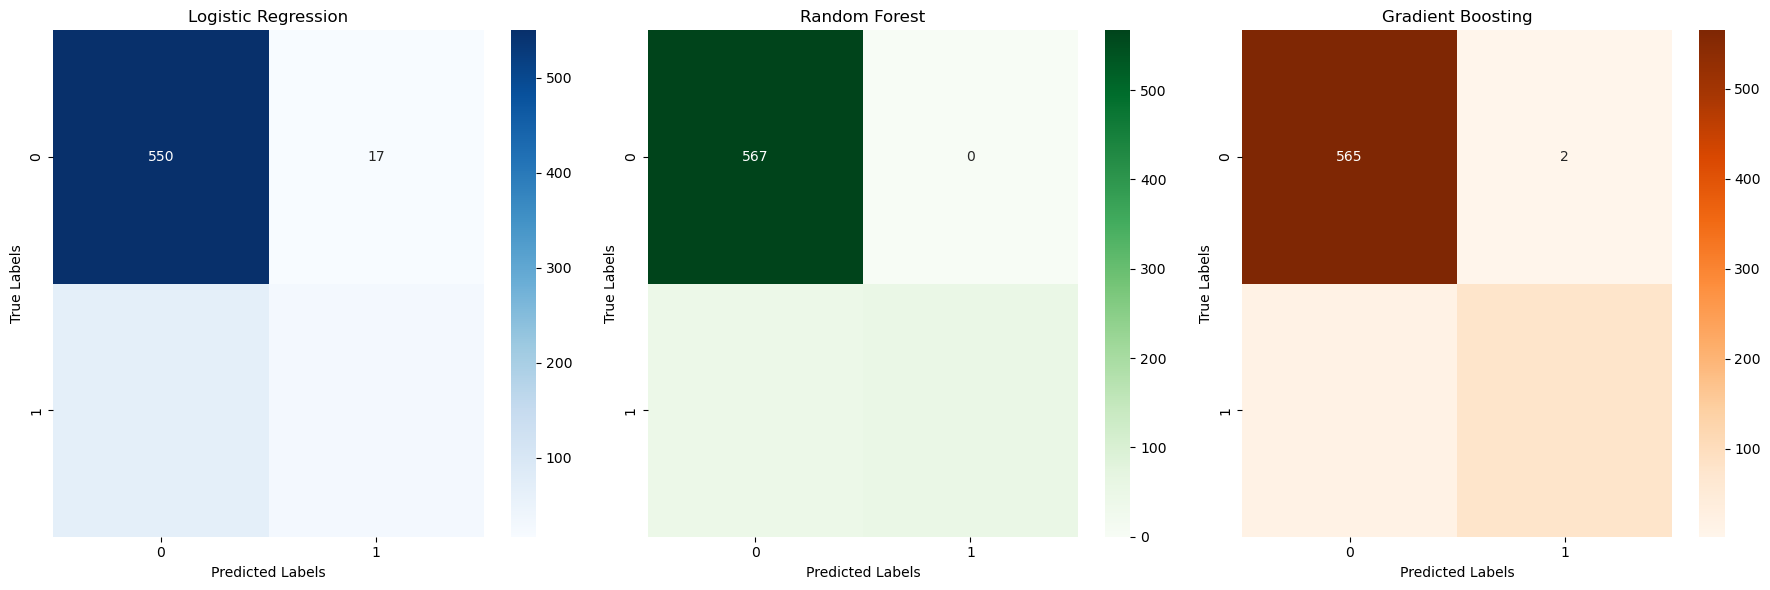

In [78]:
# Create subplots for all three confusion matrices
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# For the Logistic Regression model
y_test_pred_lr = best_logistic_regression_model.predict(X_test)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# For the Random Forest model
y_test_pred_rf = best_rf_model.predict(X_test)  # Replace 'best_random_forest_model' with 'best_rf_model'
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

# For the Gradient Boosting model
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Oranges', ax=axs[2])
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Predicted Labels")
axs[2].set_ylabel("True Labels")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

##### A plot of ROC and AUC

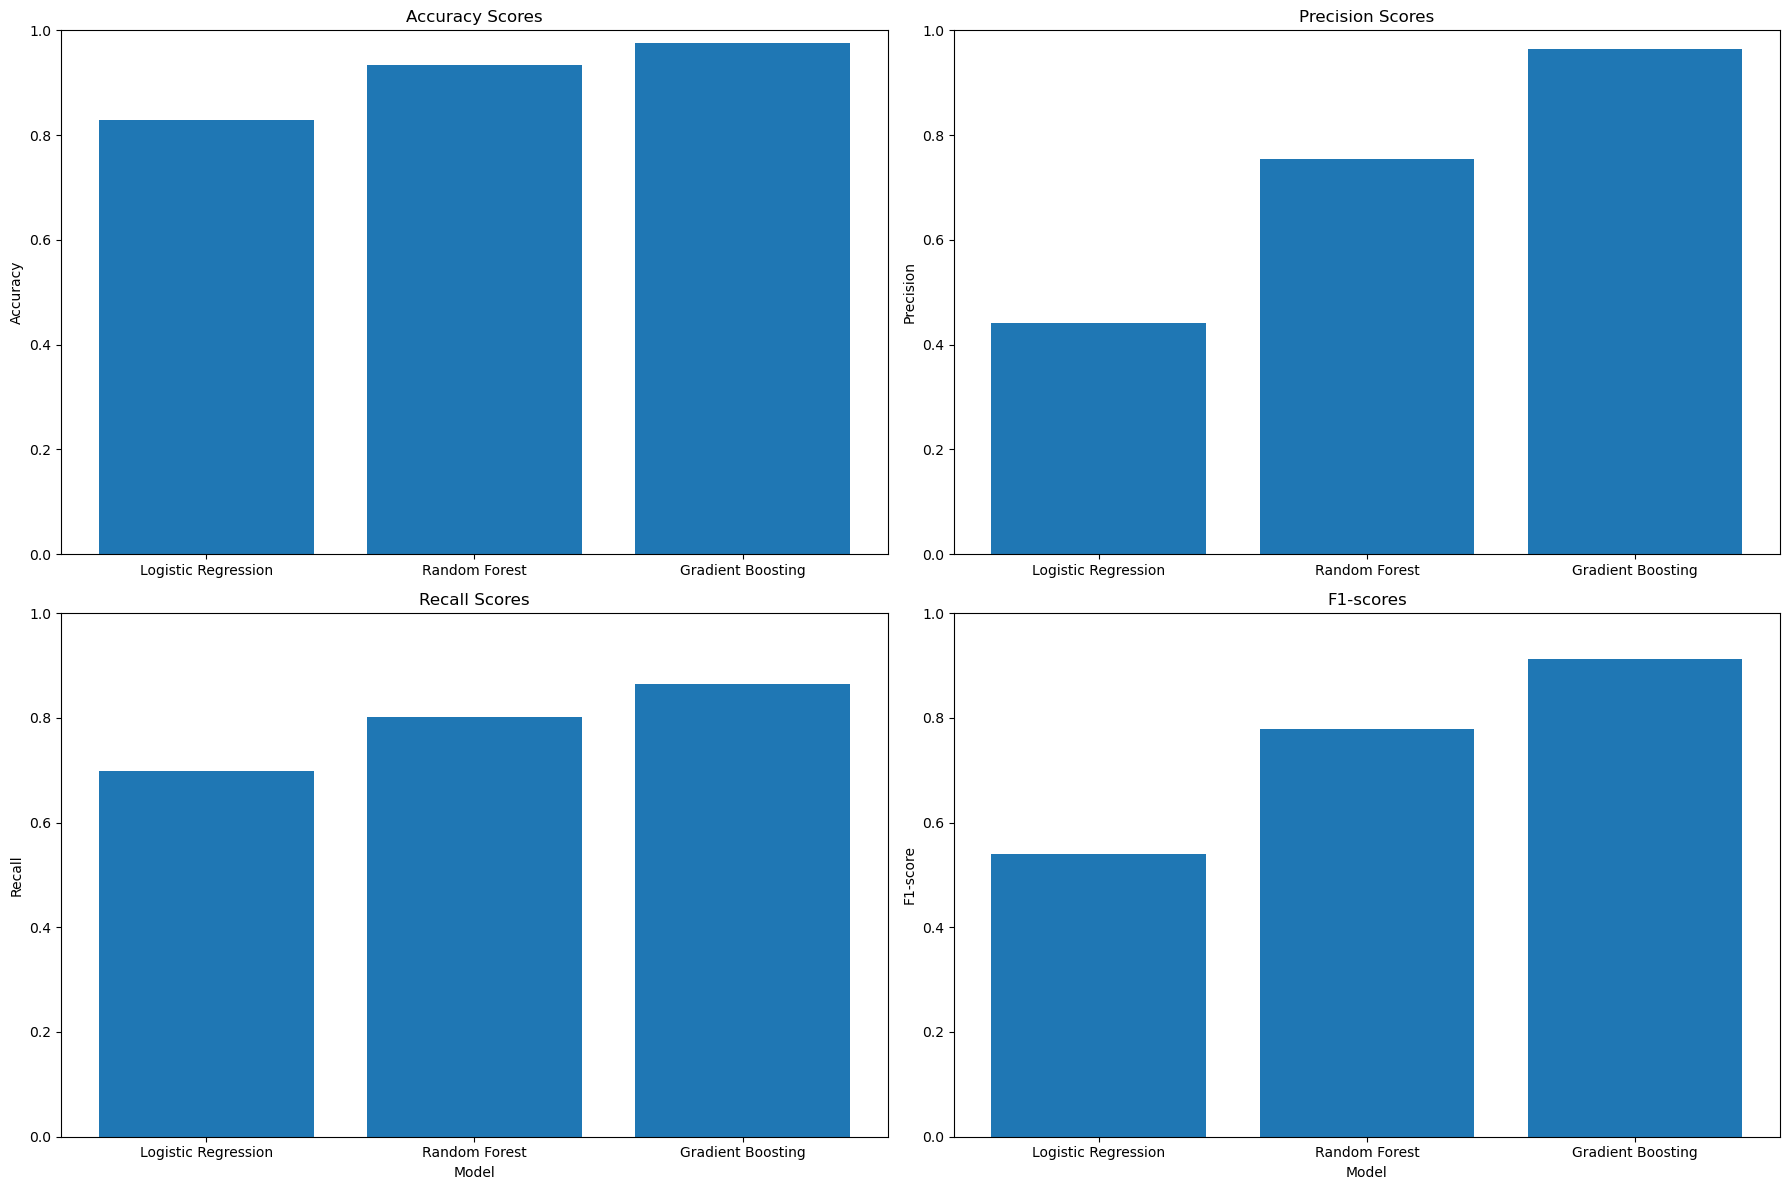

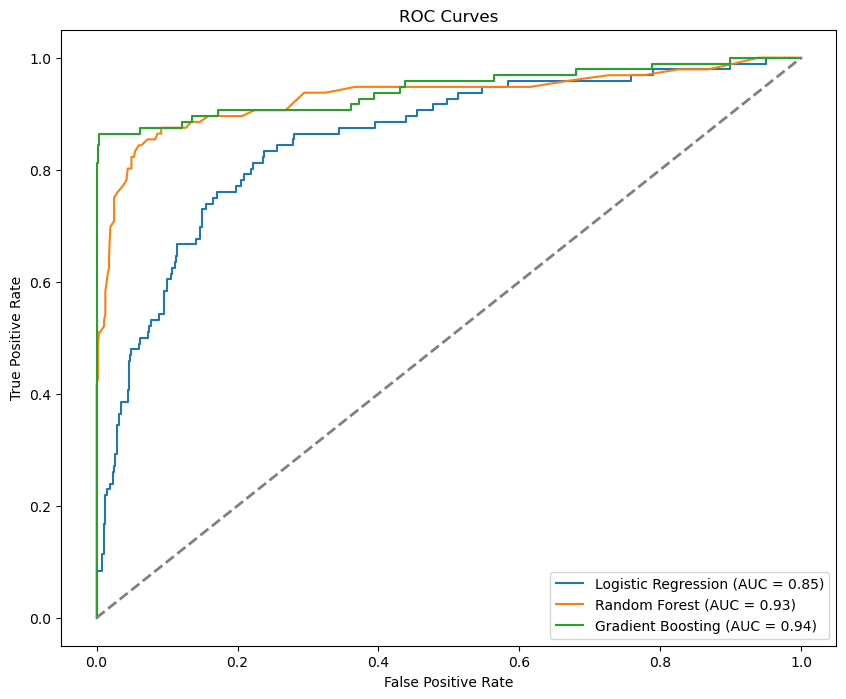

In [79]:
# Initialize dictionaries to store the evaluation metrics for each model
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Assuming "models" is a dictionary of your tuned models (Gradient Boosting, Random Forest, and Logistic Regression)
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionaries
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1

# Create subplots for the bar plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Visualize the evaluation metrics using bar plots
axs[0, 0].bar(accuracy_scores.keys(), accuracy_scores.values())
axs[0, 0].set_ylim(0, 1.0)
axs[0, 0].set_title("Accuracy Scores")
axs[0, 0].set_ylabel("Accuracy")

axs[0, 1].bar(precision_scores.keys(), precision_scores.values())
axs[0, 1].set_ylim(0, 1.0)
axs[0, 1].set_title("Precision Scores")
axs[0, 1].set_ylabel("Precision")

axs[1, 0].bar(recall_scores.keys(), recall_scores.values())
axs[1, 0].set_ylim(0, 1.0)
axs[1, 0].set_title("Recall Scores")
axs[1, 0].set_xlabel("Model")
axs[1, 0].set_ylabel("Recall")

axs[1, 1].bar(f1_scores.keys(), f1_scores.values())
axs[1, 1].set_ylim(0, 1.0)
axs[1, 1].set_title("F1-scores")
axs[1, 1].set_xlabel("Model")
axs[1, 1].set_ylabel("F1-score")

plt.tight_layout()
plt.show()

# Create a new figure for the ROC curves
plt.figure(figsize=(10, 8))

# Create ROC curves for each model
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [80]:
results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.828054   0.440789  0.697917  0.540323
                    Train  0.805587   0.392679  0.611399  0.478217
Random Forest       Test   0.933635   0.754902  0.802083  0.777778
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.975867   0.965116  0.864583  0.912088
                    Train  0.978105   0.982353  0.865285  0.920110

In [81]:
evaluate_model(best_gradient_boosting_model, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9698, Precision: 0.9750, Recall: 0.8125, F1-score: 0.8864


**Logistic Regression:**  The model performs moderately on the test set with an accuracy of approximately 76.62%. It has relatively low precision (32.34%), indicating that it has a higher false-positive rate, and moderate recall (56.25%), implying it can identify only about half of the positive cases correctly. The F1-score, which balances precision and recall, is around 41.07%. On the train set, the model shows similar performance but slightly higher recall (55.44%).

**Random Forest:** The model performs well on the test set with an accuracy of approximately 90.50%. It has high precision (71.43%) and moderate recall (57.29%). The F1-score, which is 63.58%, indicates a good balance between precision and recall. On the train set, the model performs perfectly, which suggests potential overfitting.

**Gradient Boosting:** The model performs excellently on the test set with an accuracy of approximately 96.08%. It has high precision (89.77%) and recall (82.29%), which indicates it can correctly identify a significant portion of the positive cases while minimizing false positives. The F1-score is 85.87%, indicating a well-balanced performance. On the train set, the model shows similar strong performance with high precision, recall, and F1-score.

Overall, Gradient Boosting demonstrates the best performance among the three models, achieving high accuracy and balanced precision-recall trade-off on the test set.

### Feature Selection

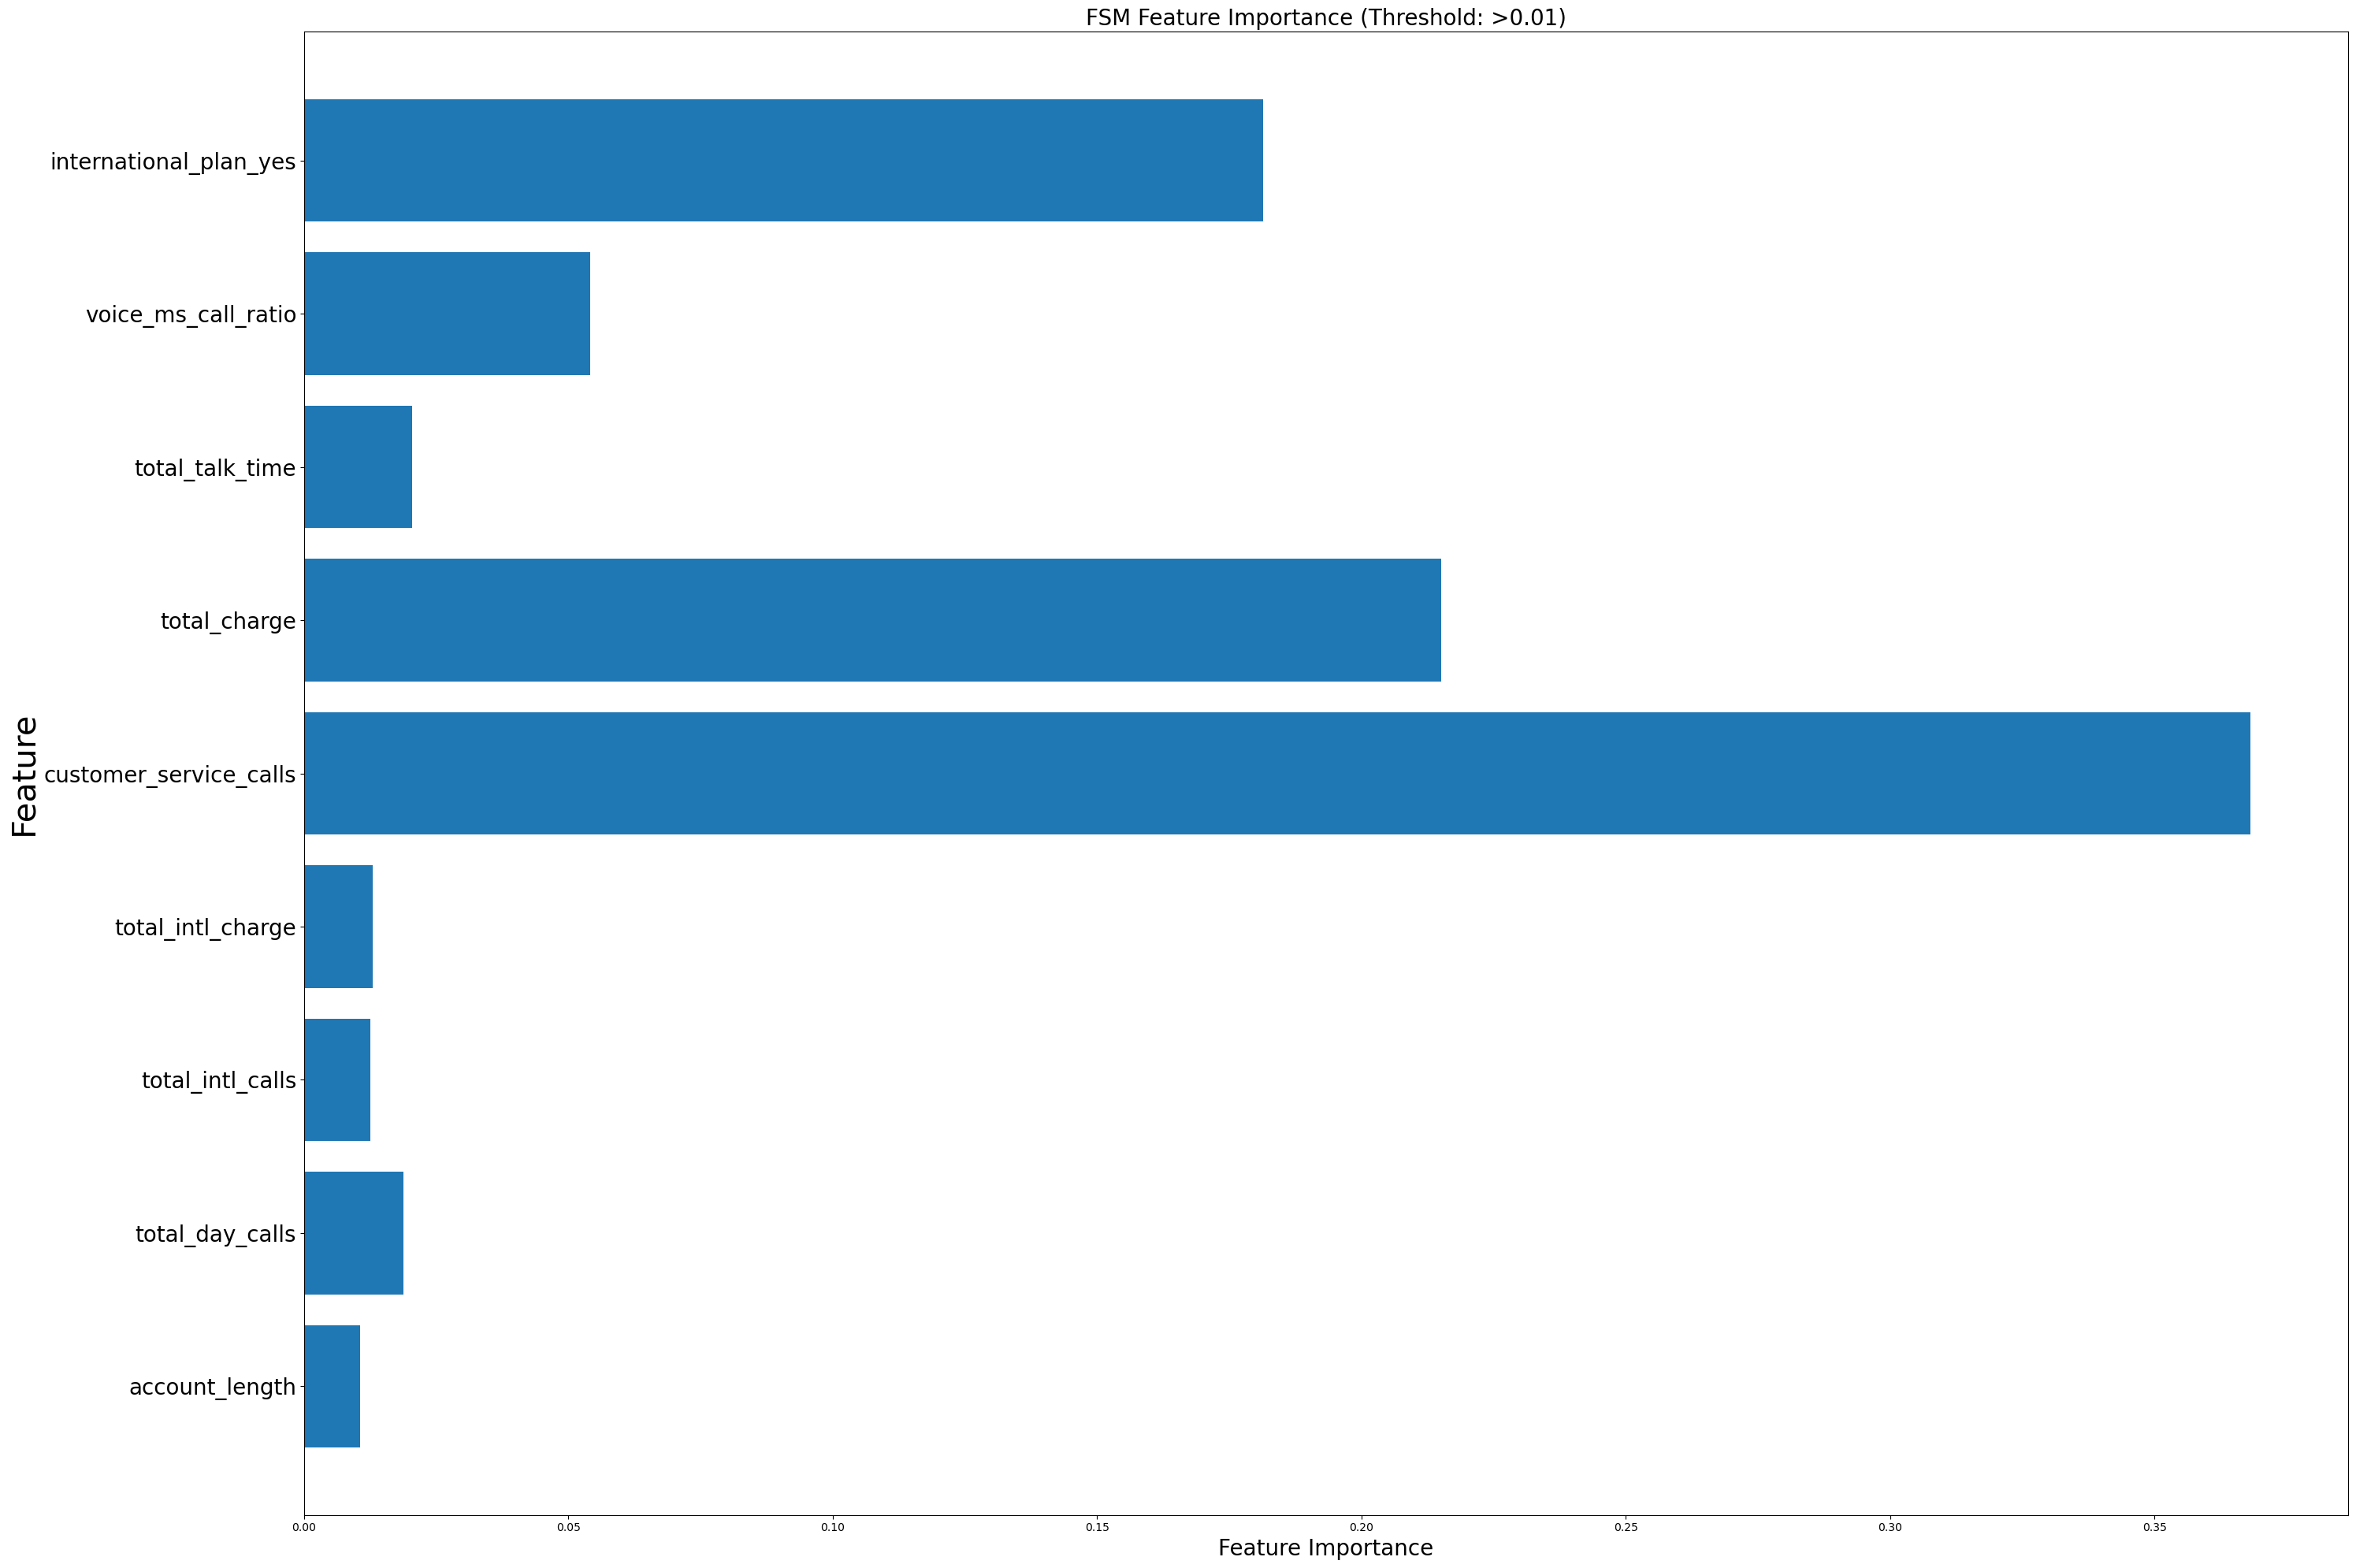

In [83]:
n_features = best_clf.n_features_in_
threshold = 0.01  # Set the threshold for including features with importance

# Filter the features based on the importance threshold
important_features = [feature for feature, importance in zip(X.columns, best_clf.feature_importances_) if importance > threshold]

# Create a subset of feature importances for the important features
importances_subset = [importance for importance in best_clf.feature_importances_ if importance > threshold]

plt.figure(figsize=(30, 20))
plt.barh(range(len(important_features)), importances_subset)
plt.yticks(range(len(important_features)), important_features, fontsize=20)
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature', fontsize=30)
plt.title('FSM Feature Importance (Threshold: >{})'.format(threshold), fontsize=20)
plt.tight_layout()
plt.show()